# FIT5149 S2 2019 Assessment 1: Predicting the Critical Temperature of a Superconductor


Student information
- Family Name: Van
- Given Name: Ngoc Khue Anh
- Student ID: 29915910
- Student email: nvan0013@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- library("ggplot2"): plot charts
- library(dplyr): data manipulation
- library(data.table): structure the data table (keep the row name as a separate column)
- library(grid): arrange grid for ggplot
- library(gridExtra)
- library("ggrepel"): readable text, replace goem_text
- library(ISLR): linear model
- library(GGally)
- library(cowplot)
- library(lattice): visualise correlation matrix
- library("caret"): find the highly correlated features, VIF
- library("corrplot"): plot correlation matrix
- library("car"): Scatterplot matrix
- library("leaps"): stepwise selection
- require(MASS): stepwise selection
- library(glmnet): Lasso regression
- library(mlbench): feature importance evaluation
- library('randomForest'): build the random forest model

## Table of Contents

* [1. Introduction](#sec_1)
* [2. Data Exploration](#sec_2)
* [3. Features Selection](#sec_3)
* [4. Model Development](#sec_4)
* [5. Model Comparison and Conclusion](#sec_5)
* [6. References](#sec_6)

## 1. Introduction <a class="anchor" id="sec_1"></a>

### Project description

This section gives a brief description of the assignment. Noted that the introduction hereunder is copied from the assignment specification. 

"Superconductivity is a phenomenon of exactly zero electrical resistance and expulsion of magnetic  flux fields occurring in certain materials, called superconductors, when cooled below a characteristic critical temperature. Superconductors are widely used in many industry fields, e.g. the Magnetic Resonance Imaging (MRI) in health care, electricity transportation in energy industry and magnetic separation, etc.
Predicting the critical temperature (Tc) of a superconductor is still an open problem in the scientic community. In the past, simple empirical rules based on experiments have guided researchers in synthesizing superconducting materials for many years. Nowadays, features (or predictors) based on the superconductor's elemental properties can be generated and used to predict Tc.
In this task, we are going to analyze superconductor data from the Superconducting Material Database maintained by Japan's National Institute for Materials Science (NIMS). The aim is to build statistical models that can predict Tc based on the material's chemical properties.
Specifically, you are going to analyse a superconductor data set, which is based on real world material science data. The problem you are going to solve is: 
- Can you predict the critical temperature Tc given some chemical properties of a material?
- explain your prediction and the associated ndings? For example, describe the key properties associated with the response variable."

### Dataset

Dataset description below is retrieved from assignment specification.

"The data set was originally from from the Superconducting Material Database maintained by Japan's National Institute for Materials Science(NIMS) and prepossessed by Kam. It contains 21,263 material records, each of which have 82 columns: 81 columns corresponding to the features extracted and the last 1 column of the observed Tc values. Among those 81 columns, the first column is the number of elements in the material, the rest 80 columns are features extracted from 8 properties (each property has 10 features).
There are two data sets: 
- train.csv can be used to train and validate prediction models and build a description (21,263 material records). Each record consists of 82 columns, containing number of elements (column 1), features extracted from 8 properties (columns 2-81) and the critical temperature (column 82). 
- unique m.csv tells you the chemical formula of each corresponding material.
In order to finish the analyse task, you should split the provided train.csv into your own training and testing sets before building the models."

### Import libraries

In [142]:
library("ggplot2") # plot charts
library(dplyr) # data manipulation
library(data.table) # structure the data table (keep the row name as a separate column)
library(grid) # arrange grid for ggplot
library(gridExtra)
library("ggrepel") # readable text, replace goem_text
library(ISLR) # linear model
library(GGally)
library(cowplot)
library(lattice) # visualise correlation matrix
library("caret") # find the highly correlated features, VIF
library("corrplot") # plot correlation matrix
library("car") # Scatterplot matrix
library("leaps") # stepwise selection
require(MASS) # stepwise selection
library(glmnet) # Lasso regression
library(mlbench) # feature importance evaluation
library('randomForest') # build random forest model

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

### Load datasets

In [3]:
# load the train and unique_m dataset
train <- read.csv("train.csv")
unique <- read.csv("unique_m.csv")

### Variable distributions and characteristics

In [4]:
# display the dimensions
cat("The train dataset has", dim(train)[1], "records, each with", dim(train)[2], "attributes. The structure is:\n\n")

# display the structure
str(train)

cat("\nThe first few and last few records in the dataset are:")
# the first few records
head(train)
# the last few records
tail(train)

cat("\nBasic statisticsc for each attributes are:")
# statisticsal summary of each features
summary(train)

cat("The number of unique values for each attributes are:")
apply(train, 2, function(x) length(unique(x)))

The train dataset has 21263 records, each with 82 attributes. The structure is:

'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
21258,3,89.38983,89.38983,63.69471,63.69471,0.7825737,0.7825737,164.13150,54.710500,73.15689,...,4.666667,4.578857,4.578857,1.0789922,1.0789922,2,0.6666667,0.9428090,0.9428090,3.43
21259,4,106.95788,53.09577,82.51538,43.13556,1.1771448,1.2541187,146.88130,15.504479,65.76408,...,3.555556,3.223710,3.519911,1.3778195,0.9136580,1,2.1688889,0.4330127,0.4969040,2.44
21260,5,92.26674,49.02137,64.81266,32.86775,1.3232866,1.5716301,188.38390,7.353333,69.23266,...,2.047619,2.168944,2.038991,1.5941667,1.3372458,1,0.9047619,0.4000000,0.2129589,122.10
21261,2,99.66319,95.60910,99.43388,95.46432,0.6908472,0.5301975,13.51362,53.041104,6.75681,...,4.800000,4.472136,4.781762,0.6869616,0.4505612,1,3.2000000,0.5000000,0.4000000,1.98
21262,2,99.66319,97.09560,99.43388,96.90108,0.6908472,0.6408830,13.51362,31.115202,6.75681,...,4.690000,4.472136,4.665819,0.6869616,0.5776012,1,2.2100000,0.5000000,0.4624932,1.84
21263,3,87.46833,86.85850,82.55576,80.45872,1.0412701,0.8952292,71.75500,43.144000,29.90528,...,4.500000,4.762203,4.242641,1.0549202,0.9701158,3,1.8000000,1.4142136,1.5000000,12.80



Basic statisticsc for each attributes are:

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

The number of unique values for each attributes are:

number_of_elements                mean_atomic_mass 
                              9                            3365 
           wtd_mean_atomic_mass               gmean_atomic_mass 
                          15164                            3365 
          wtd_gmean_atomic_mass             entropy_atomic_mass 
                          15165                            3314 
        wtd_entropy_atomic_mass               range_atomic_mass 
                          15113                            1042 
          wtd_range_atomic_mass                 std_atomic_mass 
                          12641                            3313 
            wtd_std_atomic_mass                        mean_fie 
                          15031                            2997 
                   wtd_mean_fie                       gmean_fie 
                          14940                            3286 
                  wtd_gmean_fie                     entropy_fie 
                          15089                            3238 
                wtd_entropy_fie                       range_fie 
                          15058                             854 
                  wtd_range_fie                         std_fie 
                          12266                            3185 
                    wtd_std_fie              mean_atomic_radius 
                          14922                             942 
         wtd_mean_atomic_radius             gmean_atomic_radius 
                          12423                            3148 
        wtd_gmean_atomic_radius           entropy_atomic_radius 
                          14969                            3111 
      wtd_entropy_atomic_radius             range_atomic_radius 
                          14948                             195 
        wtd_range_atomic_radius               std_atomic_radius 
                          11407                            2529 
          wtd_std_atomic_radius                    mean_Density 
                          14312                            3274 
               wtd_mean_Density                   gmean_Density 
                          15010                            3332 
              wtd_gmean_Density                 entropy_Density 
                          15085                            3283 
            wtd_entropy_Density                   range_Density 
                          15087                             890 
              wtd_range_Density                     std_Density 
                           9279                            3265 
                wtd_std_Density           mean_ElectronAffinity 
                          14939                            2377 
      wtd_mean_ElectronAffinity          gmean_ElectronAffinity 
                          13526                            2678 
     wtd_gmean_ElectronAffinity        entropy_ElectronAffinity 
                          13752                            2635 
   wtd_entropy_ElectronAffinity          range_ElectronAffinity 
                          14078                             644 
     wtd_range_ElectronAffinity            std_ElectronAffinity 
                          10937                            2562 
       wtd_std_ElectronAffinity                 mean_FusionHeat 
                          13581                            2660 
            wtd_mean_FusionHeat                gmean_FusionHeat 
                          14194                            3166 
           wtd_gmean_FusionHeat              entropy_FusionHeat 
                          14767                            3108 
         wtd_entropy_FusionHeat                range_FusionHeat 
                          14885                             595 
           wtd_range_FusionHeat                  std_FusionHeat 
                           9671                            2920 
             wtd_std_FusionHeat        mean_ThermalConductivity 
                          14470                 

 
#### Summary of Attributes

- The dataset contains 21,263 material records, each of which have 82 columns: 81 columns corresponding to the features extracted and the last 1 column of the observed Tc values. 
- Among those 81 columns, the first column is the number of elements in the material, the rest 80 columns are features extracted from 8 properties (each property has 10 features).
- Eventhough the features highly vary in terms of scale and magnitude, they share one similarity: all features are positive (the lowest minimum value is zero)

##### The table below shows the Eight properties of an element to estimate Tc (*)

|Property                 |Unit       |Description                                                    |
|-------------------------|-----------|---------------------------------------------------------------|
|Atomic mass              |AMU        |total proton and neutron rest masses                           |
|First Ionization Energy  |kJ/mol     |energy required to remove valence electron                     |
|Atomic radius            |pm         |calculated atomic radius                                       |
|Density                  |kg/m3      |density at standard temperature and pressure                   |
|Electron affinity        |kJ/mol     |energy required to add an electron to a neutral atom           |
|Fusion heat              |kJ/mol     |energy to change from solid to liquid without temp change      |
|Thermal conductivity     |W/(m x K)  |thermal conductivity coeficient                                |
|Valence                  |no units   |typical number of chemical bonds formed by the element         |


##### The table below shows the Ten features of each property, number of element and target variable (*)

|Features           |Type       |Sub-type  |Description                                                        |
|-------------------|-----------|----------|-------------------------------------------------------------------|
|Number of element  |Numerical  |Discrete  |range from 1 to 9, could have outliers                             |
|Mean               |Numerical  |Continuous|(t1 + t2)=2                                                        |
|Weighted mean      |Numerical  |Continuous|(p1.t1) + (p2.t2)                                                  |
|Geometric mean     |Numerical  |Continuous|(t1.t2)^1/2                                                        |
|Wtd geometric mean |Numerical  |Continuous|(t1)^p1.(t2)^p2                                                    |
|Entropy            |Numerical  |Continuous|-w1.ln(w1)-w2.ln(w2)                                               |
|Wtd entropy        |Numerical  |Continuous|-A.ln(A) - B.ln(B)                                                 |
|Range              |Numericl   |Discrete  |t1-t2                                                              |
|Wtd range          |Numerical  |Continuous|p1.t1-p2.t2                                                        |
|Standard deviation |Numerical  |Continuous|((1/2)((t1 - mean)^2 + (t2 -mean)^2))^1/2                          |
|Wtd sd             |Numerical  |Continuous|(p1.((t1 - v)^2 + p2.(t2 - v)^2))^1/2                              |
|Critical temp      |Numerical  |Continuous|Target variable - range from nearly 0 to 185 - could have outliers |

- In which, t1 and t2 are Rhenium Zirconium coefficients; p1 and p2 are proportion of each element; w1 and w2 are proportion of Rhenium Zirconium coefficients; A and B can be calculated based on formula
- We can see from the formulas that some of the features can actually computed from other features, such as mean and its weighted values. It shall suggest collinearity existing between variables (multicollinearity)

(*) Source: A data-driven statistical model for predicting the Critical Temperature of a Superconductor, Kam Hamidieh, 2018

#### Critical temperature

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00021   5.36500  20.00000  34.42122  63.00000 185.00000 

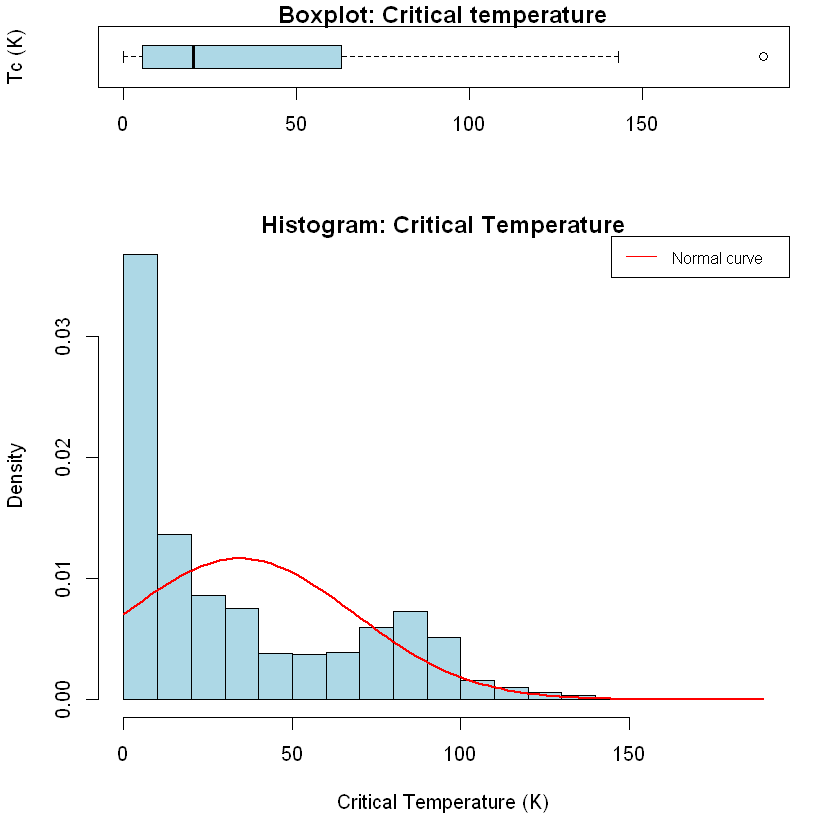

In [5]:
par(mfrow = c(2,1))

# critical temperature
ct = train$critical_temp
# summary
summary(ct)
# outline
nf <- layout(mat = matrix(c(1,2),2,1, byrow=TRUE),  height = c(1,3))
par(mar=c(5.1, 4.1, 1.1, 2.1))
# box plot of ct
boxplot(ct, horizontal=TRUE, las=1, col="lightblue", main="Boxplot: Critical temperature", ylab="Tc (K)")
# histogram of ct
hist(ct, breaks=20, main="Histogram: Critical Temperature", xlab="Critical Temperature (K)", freq=FALSE, col= "lightblue")
curve(dnorm(x, mean=mean(ct), sd=sd(ct)), col="red", lwd=2, add=TRUE)
legend("topright", legend="Normal curve", col="red", lty=1, cex=0.8)


- The mininum Tc is almost zero and the maximym Tc is 185
- Average Tc is 34 while median value is 21
- The histogram of Tc is highly skewed to the right, suggesting that there are more lower Tc in the sample
- We can also justify the skewness by comparing the red line of normal curve
- Boxplot showing that, Tc that is above 150 can be considered as outliers

#### Number of element

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   4.115   5.000   9.000 

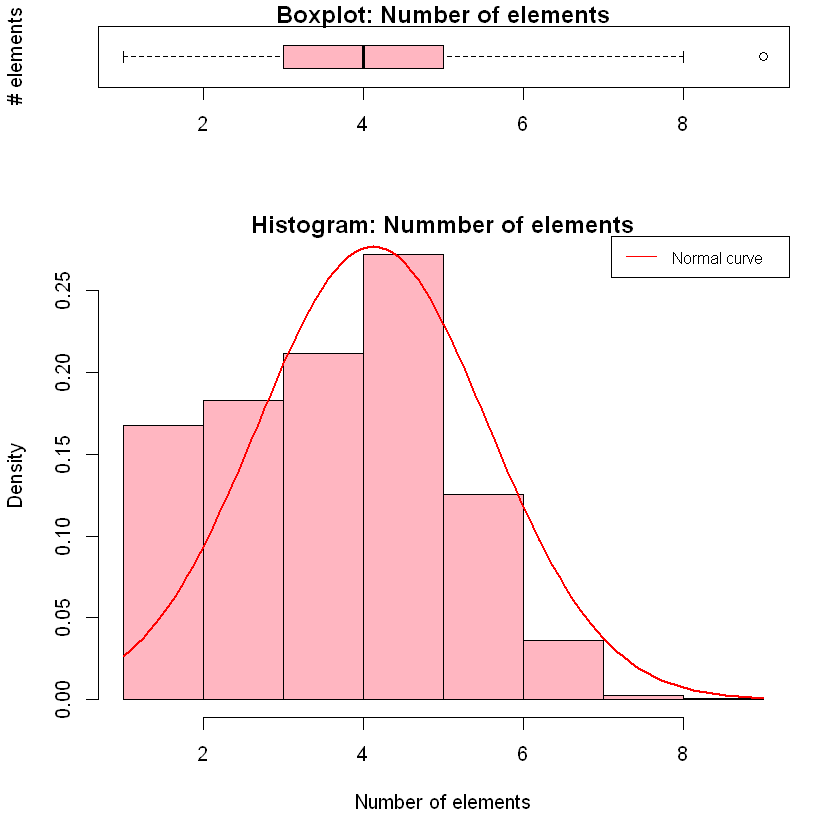

In [6]:
par(mfrow = c(1,2))

# number of element
el = train$number_of_elements
# summary
summary(el)
# outline
nf <- layout(mat = matrix(c(1,2),2,1, byrow=TRUE),  height = c(1,3))
par(mar=c(5.1, 4.1, 1.1, 2.1))
# distribution boxplot
boxplot(el, col="lightpink",horizontal=TRUE, las=1, main="Boxplot: Number of elements", ylab="# elements")
# distribution histogram
hist(el, breaks=10, main="Histogram: Nummber of elements", xlab="Number of elements", freq=FALSE, col= "lightpink")
curve(dnorm(x, mean=mean(el), sd=sd(el)), col="red", lwd=2, add=TRUE)
legend("topright", legend="Normal curve", col= "red", lty=1, cex=0.8)


 - 50% of superconductor has 3 to 5 elements
 - Average and median value are around 4 elements
 - The superconductor having 9 elements and above is considered as outlier

#### Eighty features
As described in the above section, each superconductor is recorded by 80 features derived from 8 main properties:
- Atomic Mass (AMU)
- First Ionization Energy (kJ/mol)
- Atomic Radius (pm)
- Density (kg/m3)
- Electron Affinity (kJ/mol)
- Fusion Heat (kJ/mol)
- Thermal Conductivity (W/(m x K))
- Valence (no units)

Each of the 8 property having 10 statistics features, include:
- mean_mass
- wtd_mean_mass
- gmean_mass
- wtd_gmean_mass
- entropy_mass
- wtd_entropy_mass
- range_mass
- wtd_range_mass
- std_mass
- wtd_std_mass

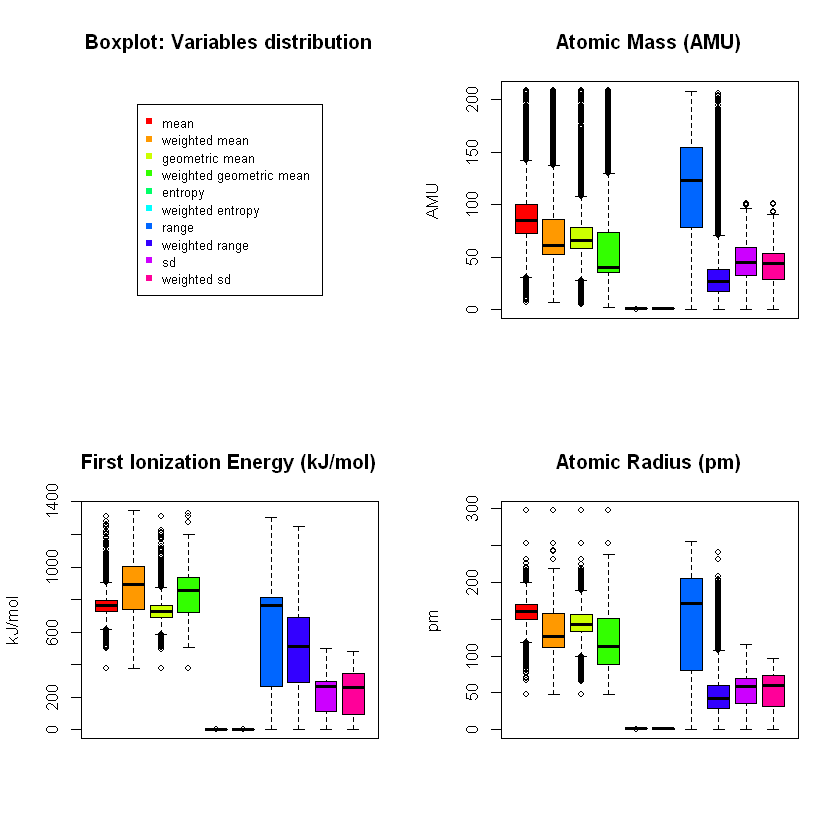

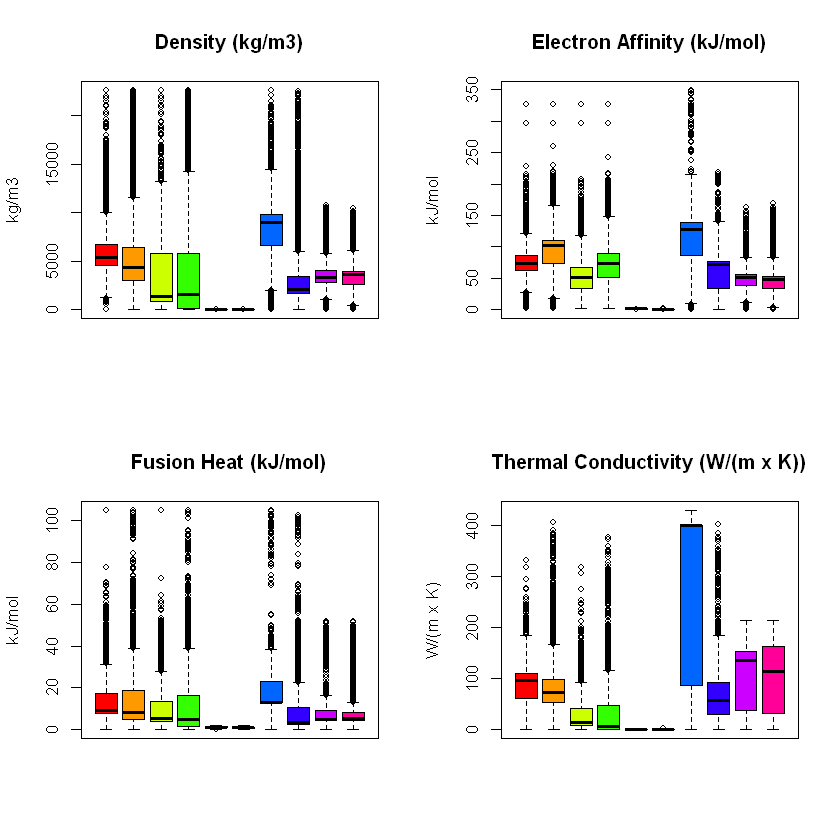

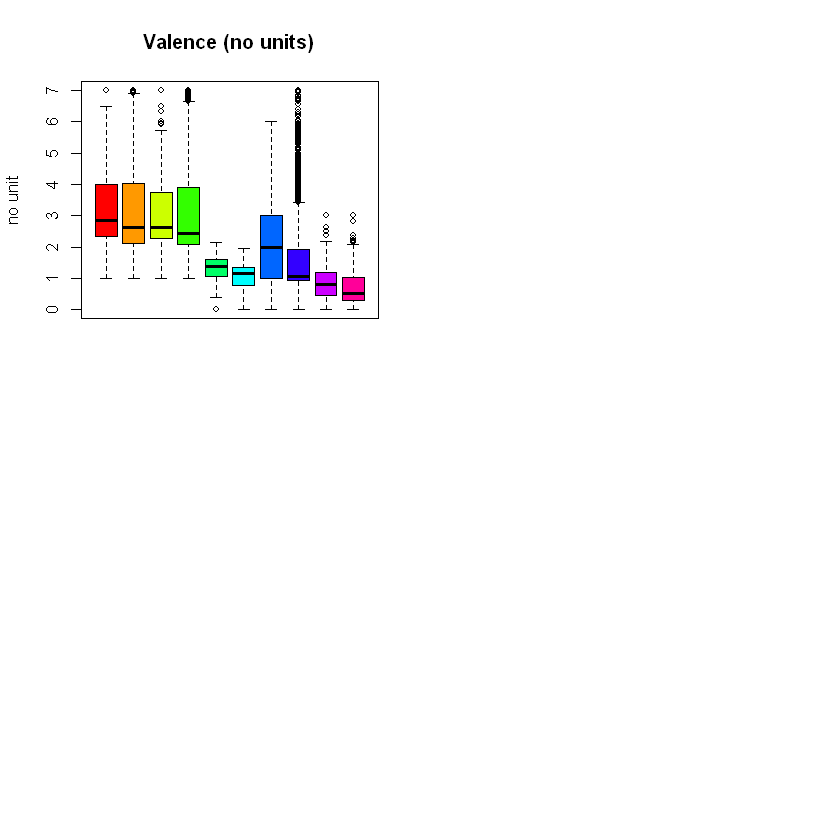

In [7]:
# extract 80 variables from the train dataset
var_df = train[, 2:81]

# color theme
colors = rainbow(10)

# plot
var_names = c("Atomic Mass (AMU)","First Ionization Energy (kJ/mol)",
              "Atomic Radius (pm)", "Density (kg/m3)","Electron Affinity (kJ/mol)", 
              "Fusion Heat (kJ/mol)","Thermal Conductivity (W/(m x K))", "Valence (no units)")
# legend
features = c("mean","weighted mean","geometric mean","weighted geometric mean","entropy",
             "weighted entropy","range","weighted range","sd","weighted sd")
# ylab
units = c("AMU","kJ/mol","pm","kg/m3","kJ/mol","kJ/mol","W/(m x K)","no unit")


par(mfrow = c(2,2))
# legend plot
plot(NULL ,xaxt='n',yaxt='n',bty='n',ylab='',xlab='', xlim=0:1, ylim=0:1,
     main="Boxplot: Variables distribution")
legend("center", legend = features, col=colors, pch=15, cex=0.8, ncol=1)

# loop to create one boxplot for each property
for (i in 1:8) {
    start = 10*i - 9
    end = 10*i
    boxplot(var_df[, start:end], ces.axis=1, main=var_names[i], xaxt="n", ylab=units[i], col=colors,
            font.main=2, font.lab=2, font.sub=2)
}

- The eight properties have different units, i.e. kJ/mol, AMU, kg/m3, etc., leading to different ranges. For example, Density's features are up to 20,000 (units), while Fusion heat is only upto 100 (units). It should be a hint for data normalisation and standadisation (?)
- The distribution of entropy and weighted entropy are less spread out in range compared to other features, consistently for all eight properties
- The range feature of thermal conductivity, Atomic mass, FIE and Atomic radius are widely spread out
- Some of the features have considerable amount of outliers, such as mean in Atomic mass

### Association between variables

#### Association between Number of element and Critical Temperature

In [8]:
# theme set-up
theme_update(plot.title = element_text(hjust = 0.5))

My_Theme = theme(axis.title.x = element_text(size = 10),
                 axis.text.x=element_blank(),
                 axis.ticks.x=element_blank(),
                 axis.title.y = element_text(size = 10),
                 plot.title = element_text(size = 12, face = "bold"))

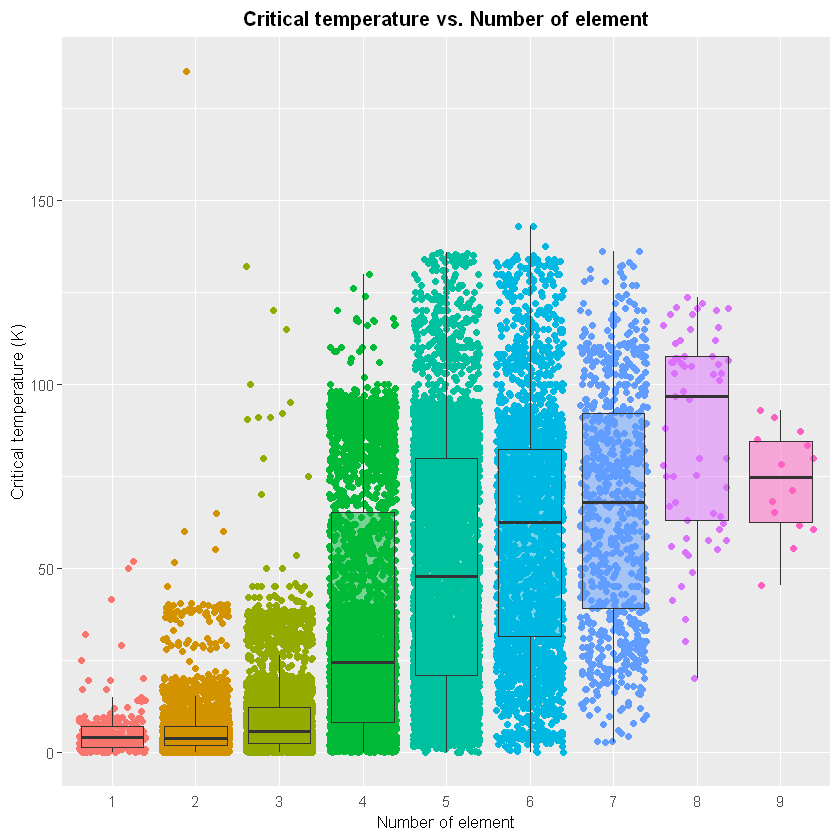

In [9]:
# number of element
no_el <- as.factor(train$number_of_elements)

# plot the chart
p <- ggplot(data=train, aes(x=no_el, y=critical_temp)) +
        geom_jitter(stat="identity", aes(color = no_el)) +
        geom_boxplot(aes(fill = no_el), alpha = 0.5, outlier.shape = NA) +
        xlab("Number of element") +
        ylab("Critical temperature (K)") +
        ggtitle("Critical temperature vs. Number of element") +
        theme(axis.title.x = element_text(size = 10),
              axis.ticks.x=element_blank(),
              axis.title.y = element_text(size = 10),
              plot.title = element_text(size = 12, face = "bold"),
              legend.position = "none")
p

- We can see there is an upwarding trend of critical temperature from the left to the right of the plot
- The plot suggests a positive correlation between Number of element and the target variable

#### Correlation matrix of each property and the target variable
- Next, we are going to plot the correlation matrix among 10 features versus the Critical Temperature of each individual property. 
- Eight correlation plots will be created for each variabl using for loop and corrplot package.
- Note that some of the below codes for plotting correlation are retrieved from http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram

In [10]:
# The following code is retrieved from http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
# compute the matrix of correlations
cor.mtest <- function(mat, ...) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j], ...)
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat) 
  p.mat
}

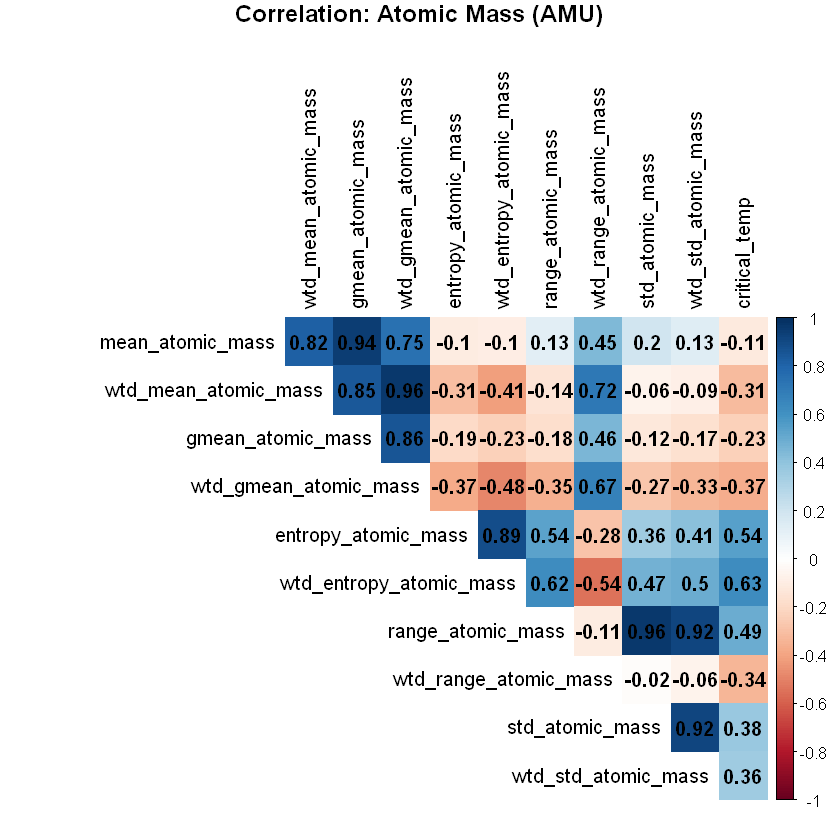

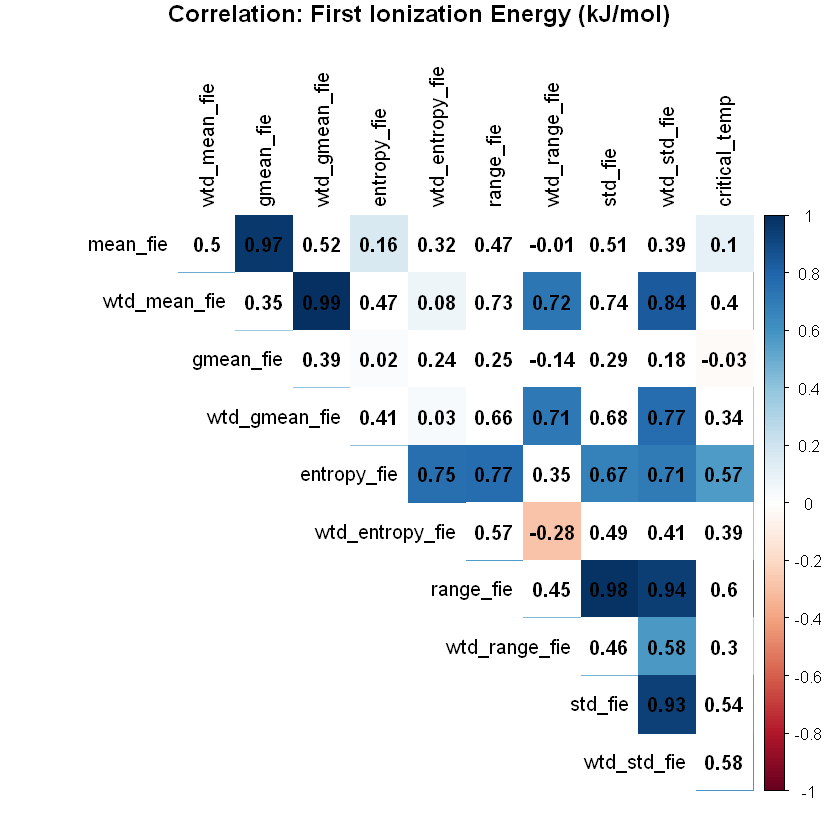

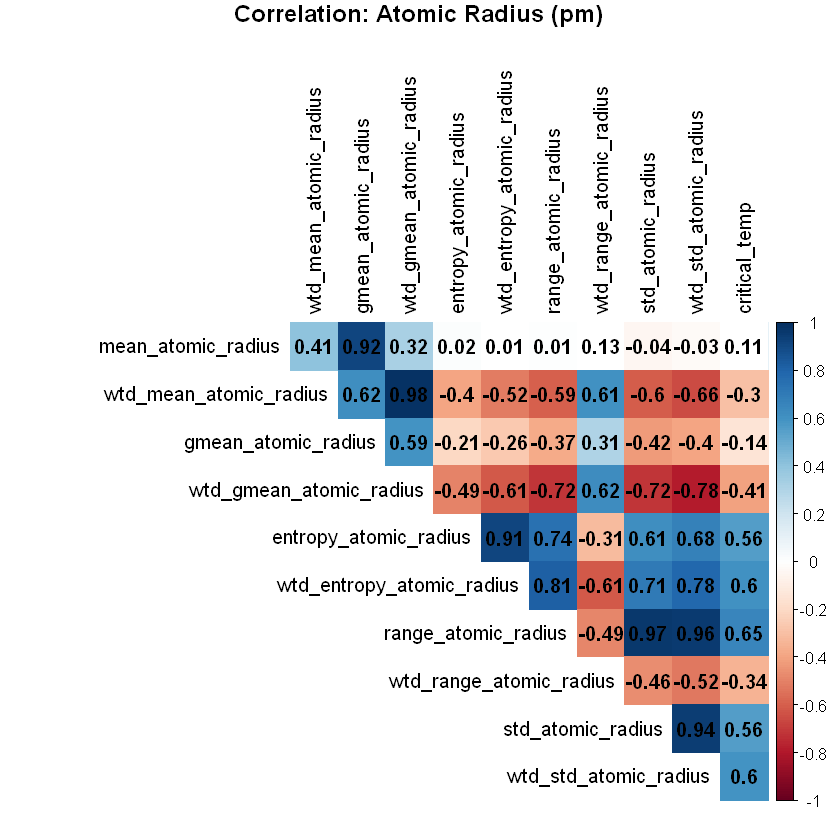

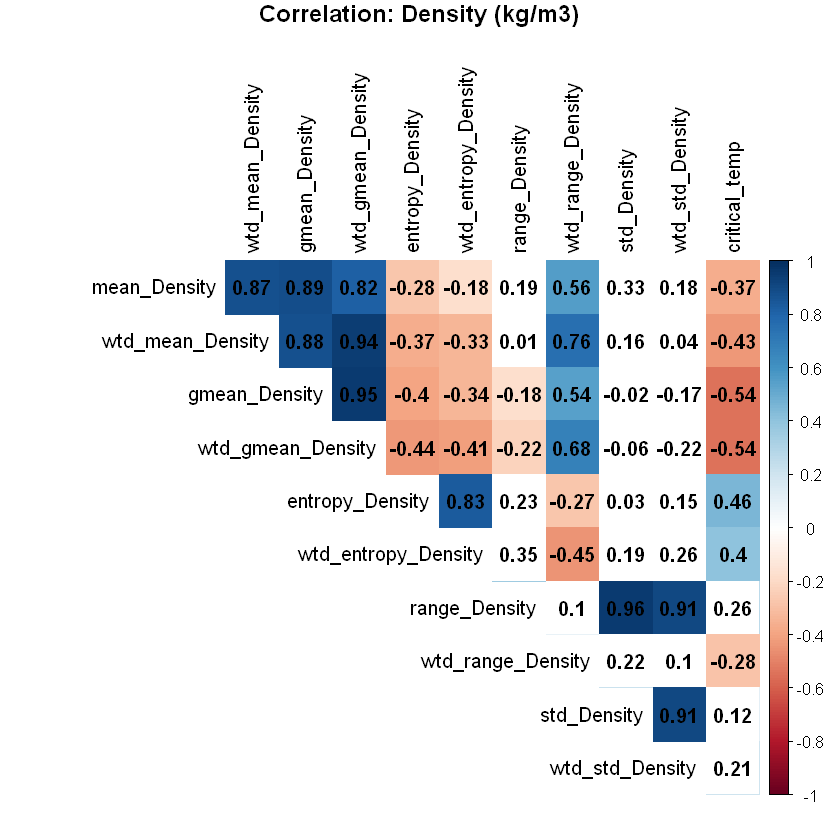

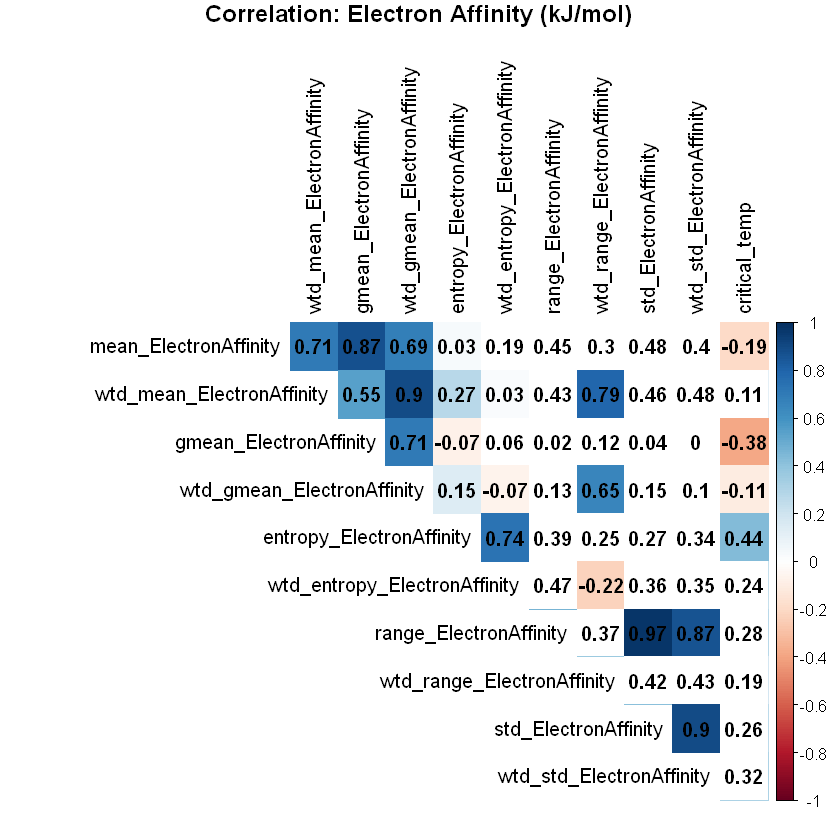

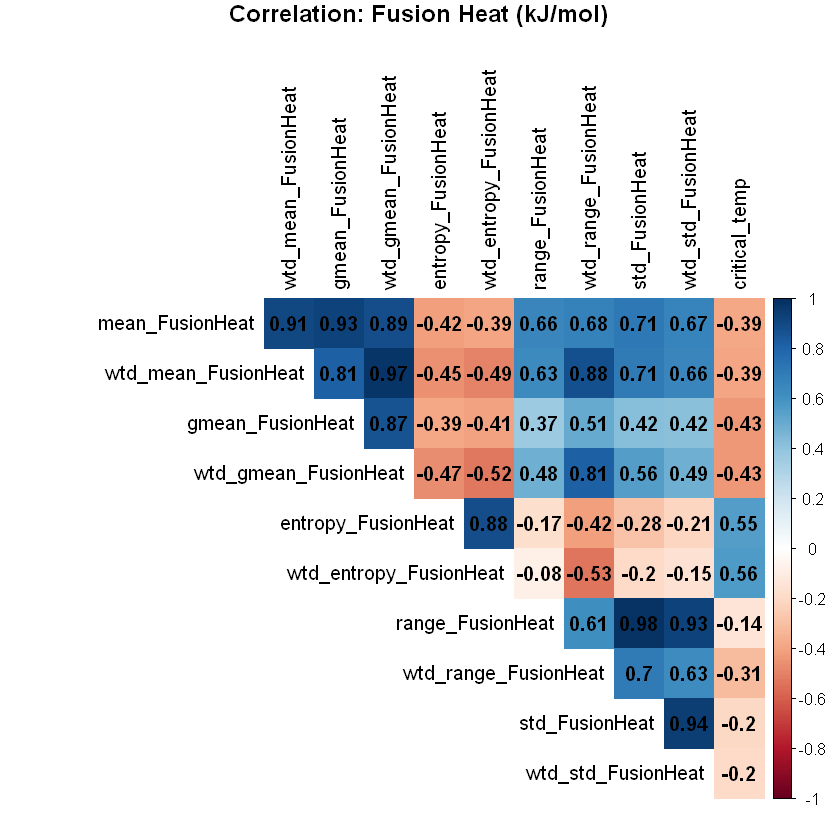

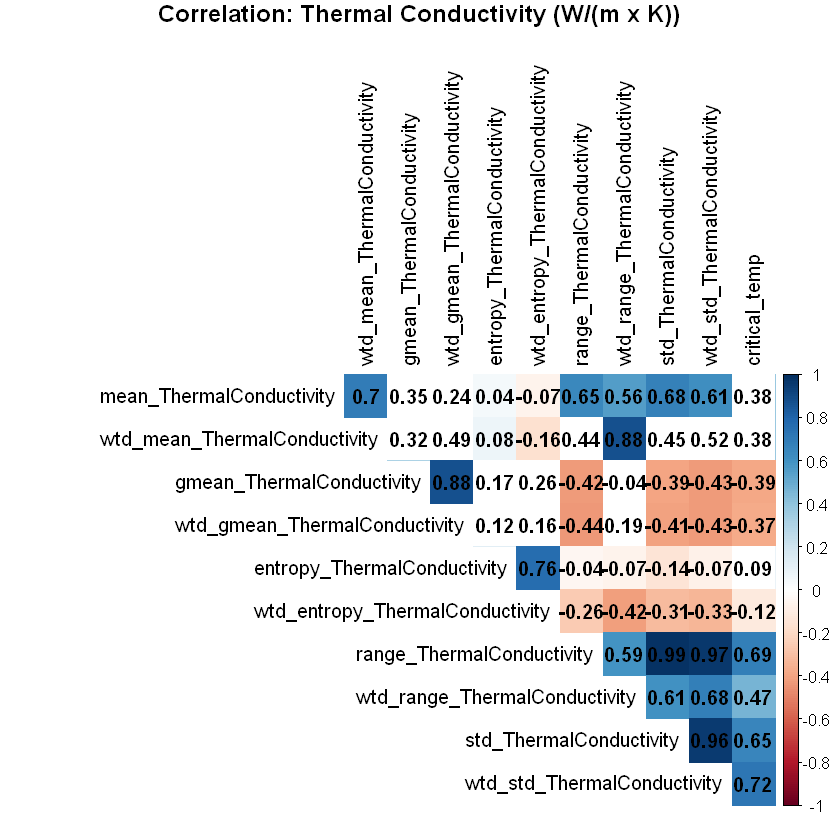

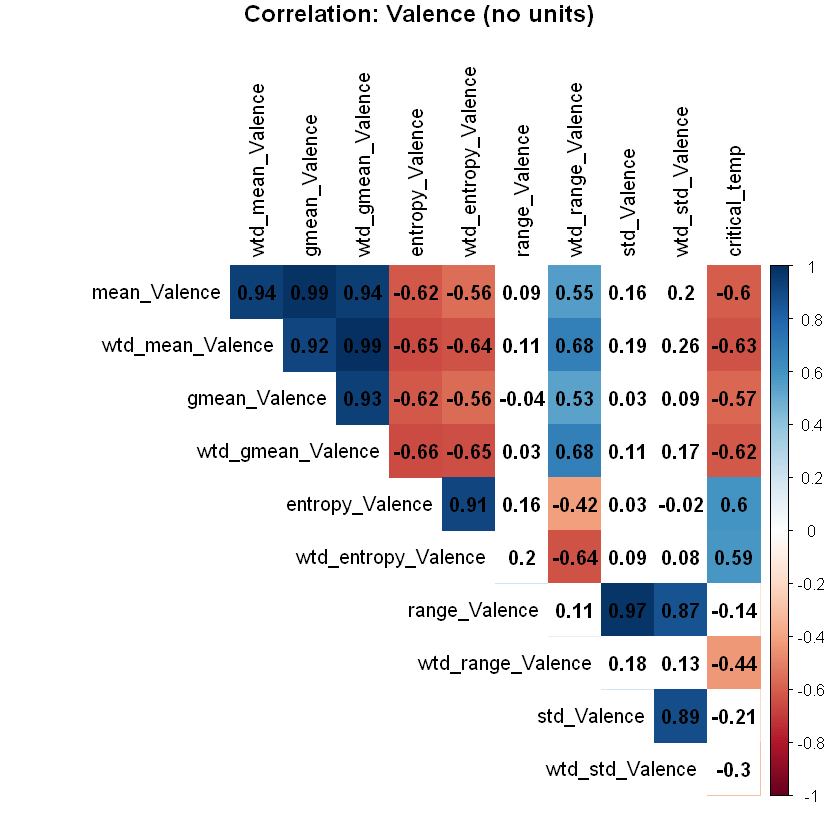

In [11]:
# extract 80 variables from the train dataset
var_df = train[,2:81]

# plot for each of the eight variables
plot_names = c("Correlation: Atomic Mass (AMU)","Correlation: First Ionization Energy (kJ/mol)",
               "Correlation: Atomic Radius (pm)", "Correlation: Density (kg/m3)",
              "Correlation: Electron Affinity (kJ/mol)", "Correlation: Fusion Heat (kJ/mol)",
               "Correlation: Thermal Conductivity (W/(m x K))", "Correlation: Valence (no units)")

# loop to create correlation plots
for (i in 1:8) {
    start = 10*i - 9
    end = 10*i
    
    # correlation of 10 features and critical temperature
    matrix <- cbind(var_df[,start:end],train["critical_temp"])
    corrMatrix <- cor(matrix)
    p.mat <- cor.mtest(corrMatrix)

    # plot
    corrplot(corrMatrix, method="color", 
             diag=FALSE, type="upper", title=plot_names[i], 
             addCoef.col = "black", # add coefficient of correlation
             tl.col="black", # text label
             # combine with significance
             p.mat = p.mat, sig.level = 0.05, insig = "blank", 
             # hide correlation coefficient on the principal diagonal
             mar=c(0,0,1,0)
         )
    
#     scatterplotMatrix(~.,data=matrix)
#     pairs(matrix)
    
}

##### Correlation amongst variables 
- The four mean variables (including mean, weighted mean, geometric mean and weighted geometric mean) are highly correlated with each other for some of the properties, especially for Atomic Mass, Density Fusion Heat, and Valence
- Entropy and weighted entropy are negatively correlated with the four mean variable, evengthough with quite small magnitude
- Range feature has strong positive correlation with standard devidation and weighted standard deviation. This characteristic holds consistent for most of the properties

##### Correlation with the target variable
- Entropy has a decent postitive correlation with Critical temperature (0.4 to 0.6) across the properties, only apart for Thermal conductivity
- The four mean features usually have negative correlation with the target variable, excluding some such as FIE and Electron Affility

##### Conclusion
- Due to high correlation between some of the features, we shall wish to exclude some of them from the model

#### Association between material's chemical formula and Critical temperature

##### Proportion of superconductor containing a certain element 

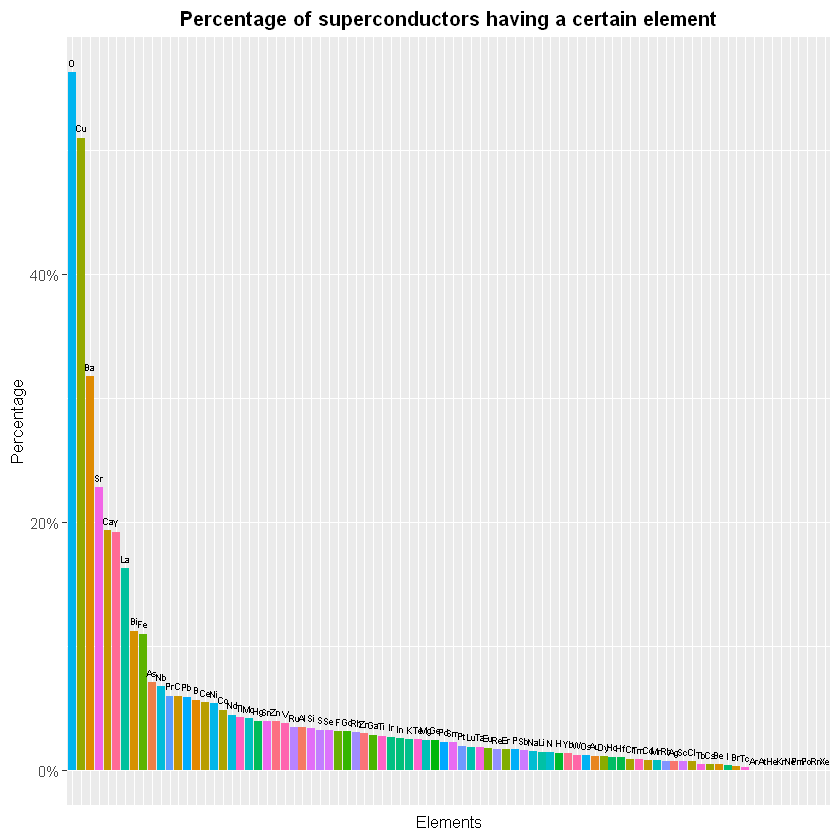

In [12]:
# extract the element names and occurence from unique_m dataset
che <- c() # name
che_occurence <- c() # occurence
for (i in 1:(ncol(unique)-2)) {
    che <- c(che, colnames(unique)[i])
    che_occurence <- c(che_occurence, sum(unique[i] != 0))
}
# create a dt
che_df <- data.frame("Element" = che, "Occurence" = che_occurence/nrow(unique))

# the proportion of superconductor containing a certain element
p <- ggplot(data= che_df, aes(x=reorder(Element, -Occurence), y=Occurence, fill=Element)) + 
            geom_bar(stat="identity") + 
            geom_text(aes(label=Element), position=position_dodge(width=0.2), vjust=-0.8, size=2) +
#             coord_flip() +
            scale_y_continuous(labels = function(Occurence) paste0(Occurence*100, "%")) +
            guides(fill=FALSE) +
            xlab("Elements") + 
            ylab("Percentage") +
            ggtitle("Percentage of superconductors having a certain element") +
            My_Theme
p

- More than 55% of superconductors in our sample containing 'O' as an element, followed by 'Cu' and 'Ba'. 
- We can probably conclude that these are highly popular elements of superconductors

#### Association between chemical element and target variable

In [13]:
# prepare the data
with_mean <- c() # avarage Tc of superconductor not having a certain element
without_mean <- c() # avarage Tc of superconductor having a certain element

# extract from dataset to create the two above vectors
for (i in 1:(ncol(unique)-2)) {
    
    # name of the element
    el <- colnames(unique)[i]
     # check if the element is included in superconductor or not
    column <- unique[i]
    
    # those superconductors with the element
    with_el <- unique %>% filter(column!=0)
    mean_w <- mean(with_el$critical_temp)
    names(mean_w) <- el
    # compute avarage critical temperature, create a vector
    with_mean <- c(with_mean, mean_w)
    
    # those superconductors without the element
    without_el <- unique %>% filter(column==0)
    mean_wo <- mean(without_el$critical_temp)
    names(mean_wo) <- el
    # compute avarage critical temperature, create another vector
    without_mean <-c(without_mean, mean_wo)
}

# create a dataframe from the two vectors
el_df <- data.frame(with_mean, without_mean)
setDT(el_df, keep.rownames = TRUE) # include the vector name as a separate column
names(el_df) <- c("Element","With_element", "Without_element")

Warning message:
"Removed 9 rows containing missing values (geom_path)."Warning message:
"Removed 9 rows containing missing values (geom_text_repel)."

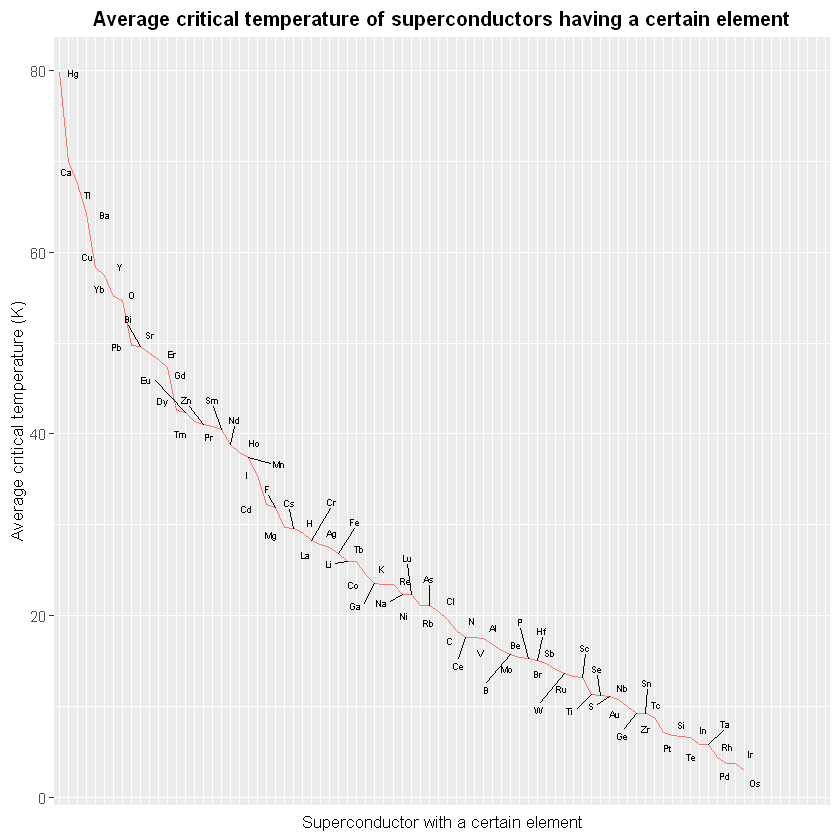

In [14]:
# Average Tc of superconductor with a certain element
p1 <- ggplot(data=el_df, aes(x=reorder(Element, -With_element), y=With_element, group=1)) +
    geom_line(aes(color="pink")) +
    geom_text_repel(aes(label=Element), position=position_dodge(width=0.2), size=2) +
    guides(fill=FALSE) +
    xlab("Superconductor with a certain element") + 
    ylab("Average critical temperature (K)") +
    ggtitle("Average critical temperature of superconductors having a certain element") +
    My_Theme +
    theme(legend.position = "none")
p1

- The above plot shows the average Tc of those superconductors having a certain element in their chemical formular
- Superconductors, containing 'Hg' in their chemical formula, have very high average Tc of 80. Those with 'Ca', 'Tl', 'Ba' and 'Cu' also have large average Tc of above 60
- On the other hand, average Tc of superconductors that have 'Os', 'Pd', 'Ir' are extremely low (below 5)

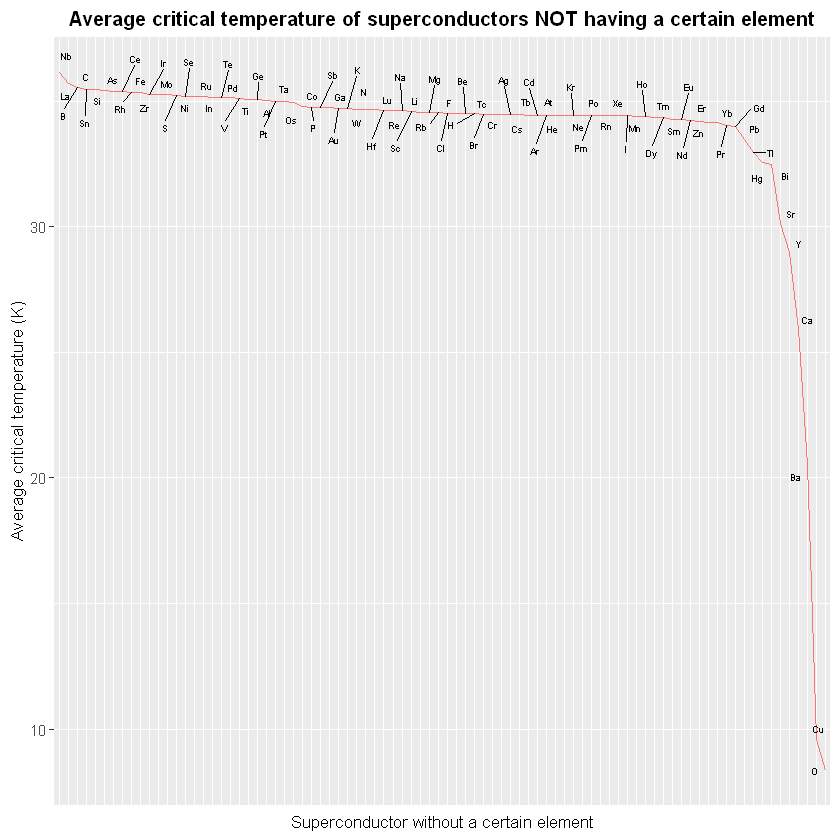

In [15]:
# Average Tc of superconductor without a certain element
p2 <- ggplot(data=el_df, aes(x=reorder(Element, -Without_element), y=Without_element, group=1)) +
    geom_line(aes(color="pink")) +
    geom_text_repel(aes(label=Element), position=position_dodge(width=0.2), size=2) +
    guides(fill=FALSE) +
    xlab("Superconductor without a certain element") + 
    ylab("Average critical temperature (K)") +
    ggtitle("Average critical temperature of superconductors NOT having a certain element") +
    My_Theme +
    theme(legend.position = "none")
p2

- This chart, on the other hand, illustrates the avarage Tc of superconductors not having a certain element
- We can see quite interesting in the chart that superconductors without 'O', 'Cu' and 'Ba' can have substantially low Tc. Noted that we have discovered previously that these are also the top three popular elements in superconductors

##### Differences in Tc distribution between superconductors having and not having a certain element

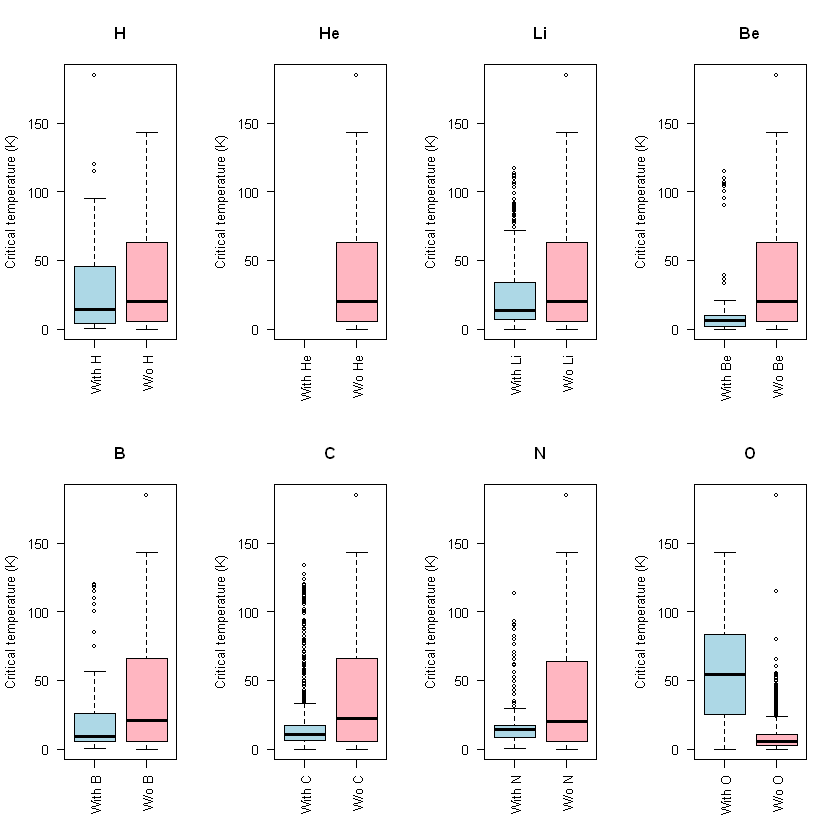

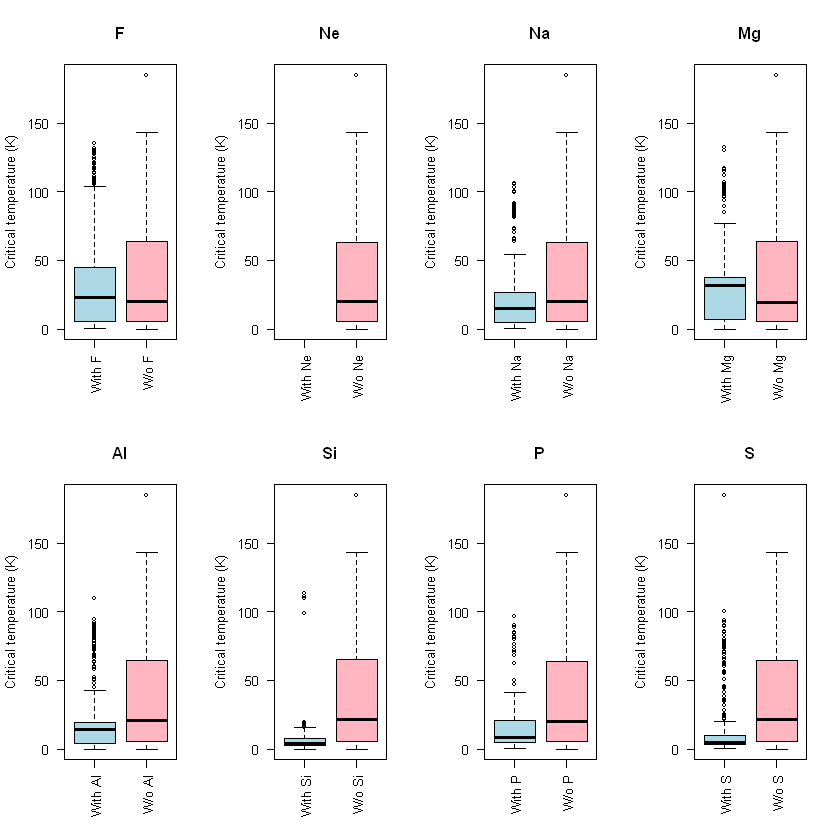

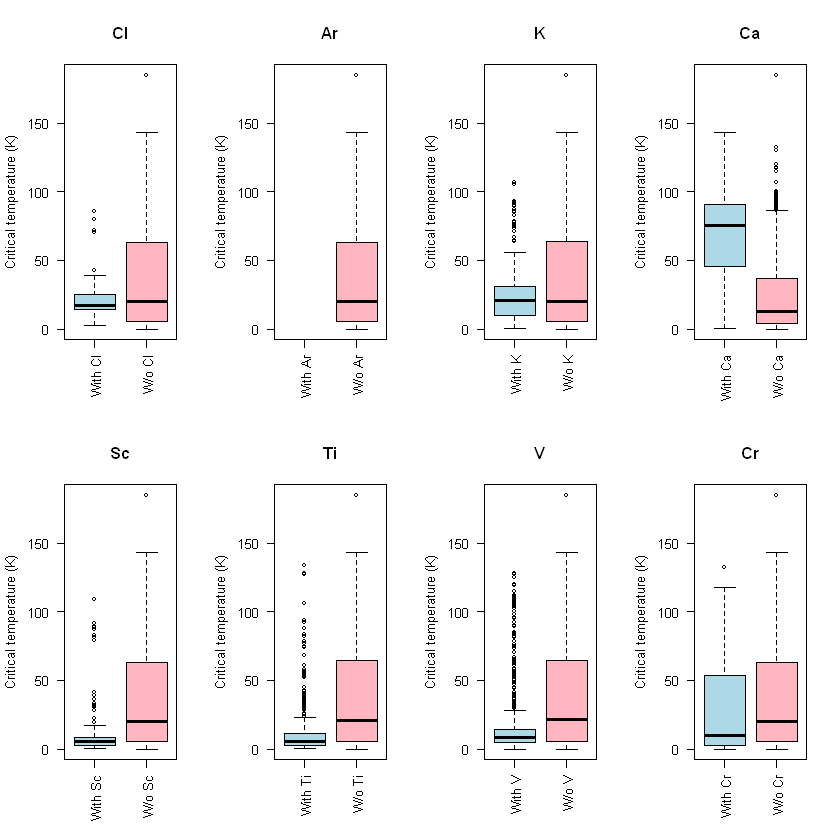

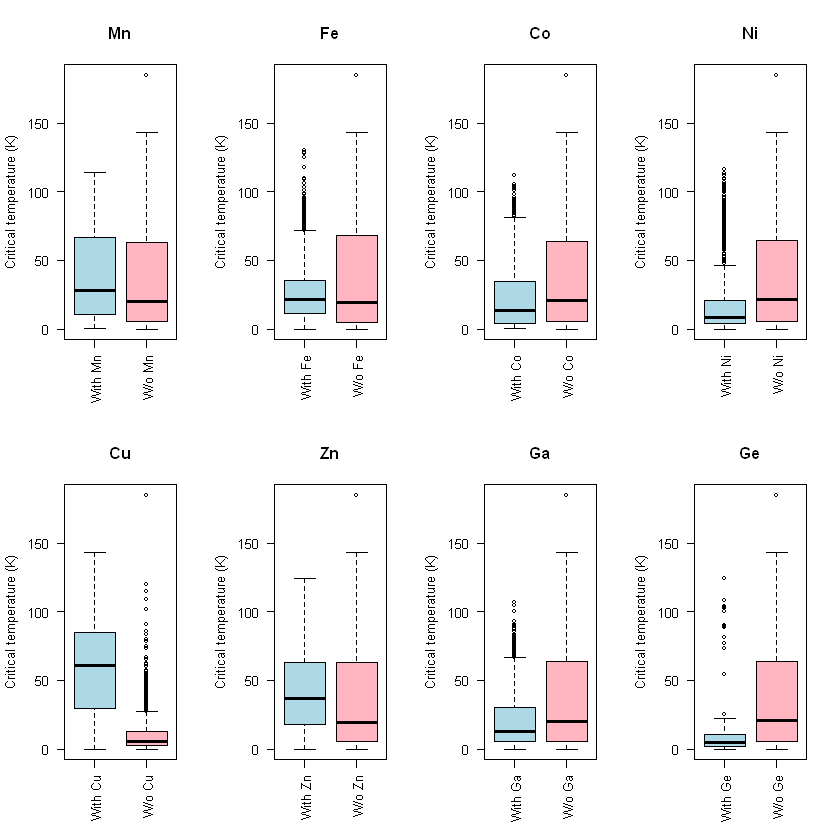

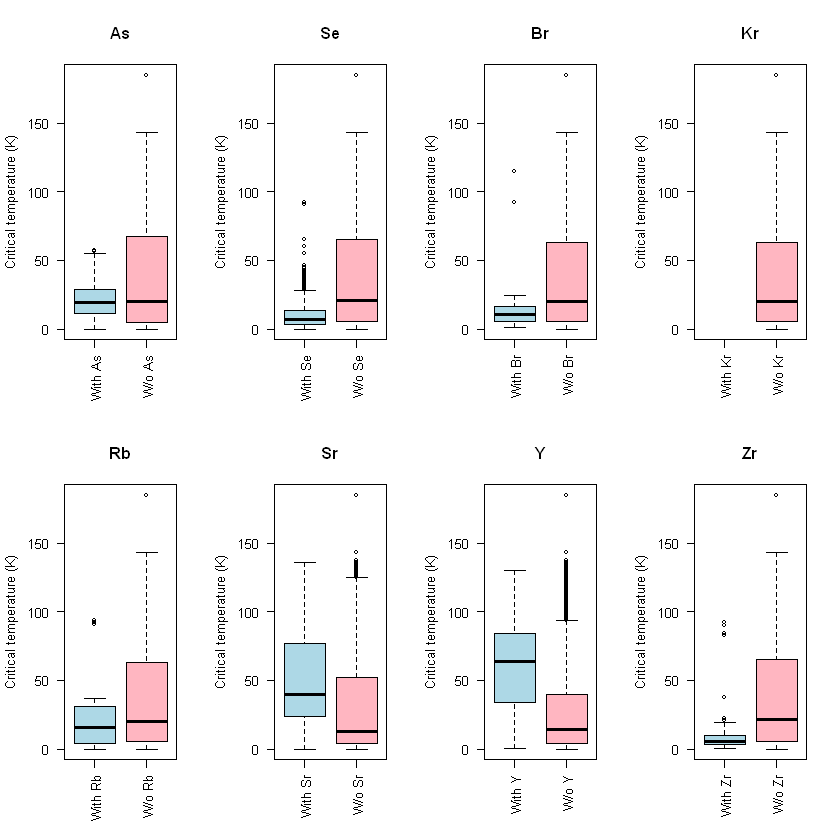

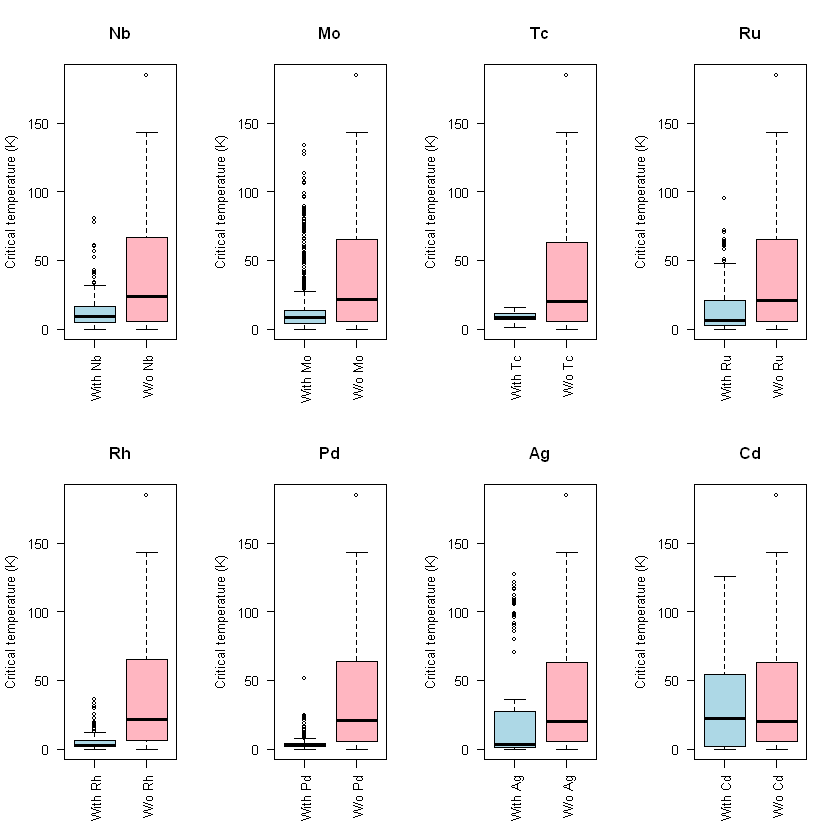

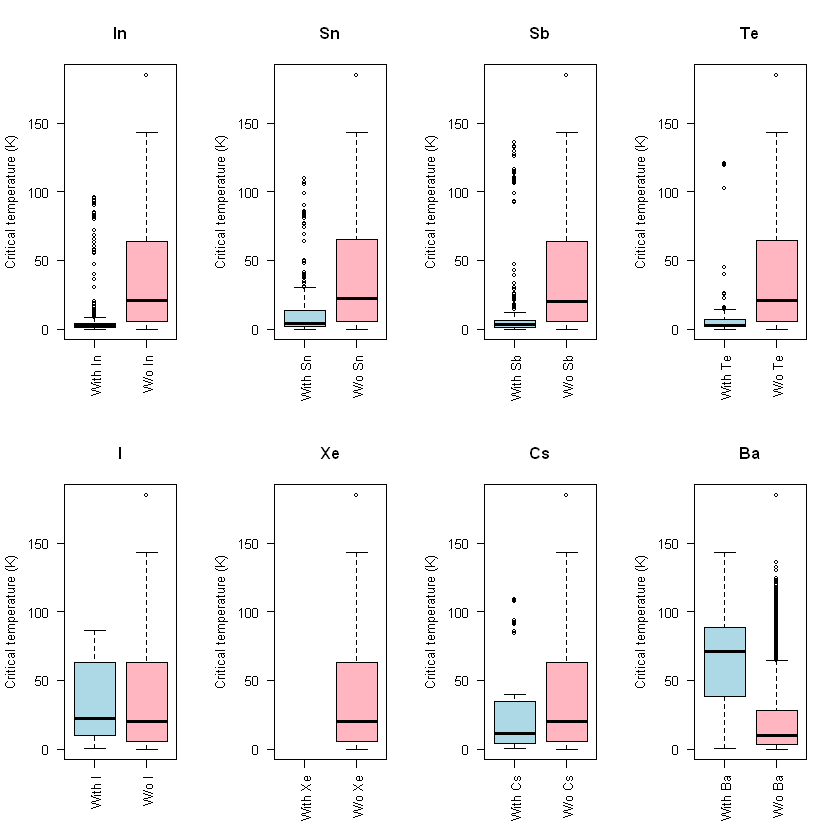

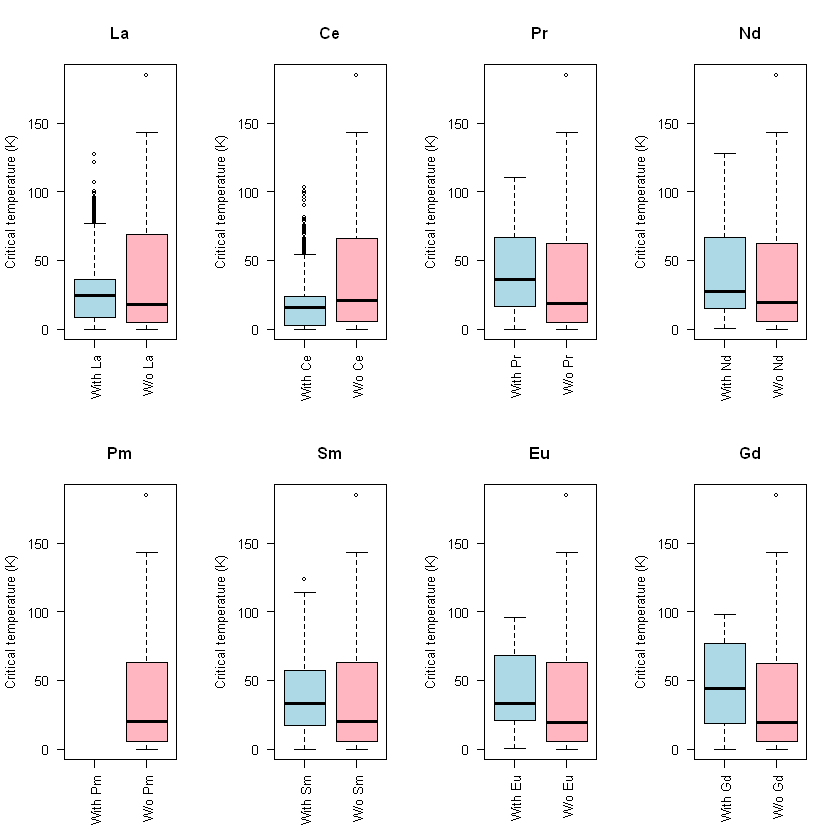

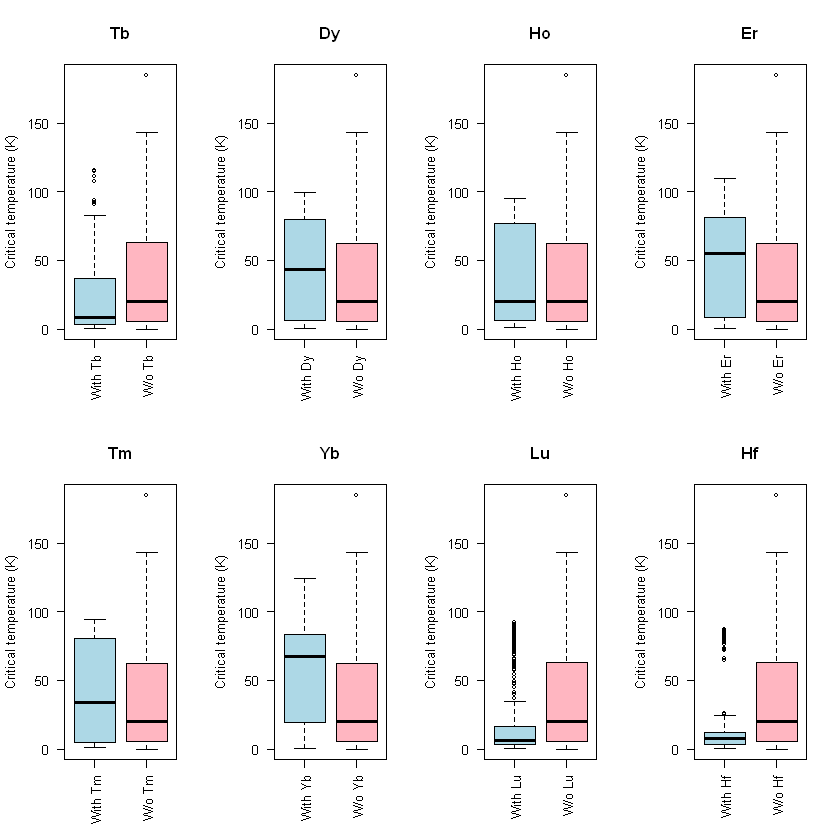

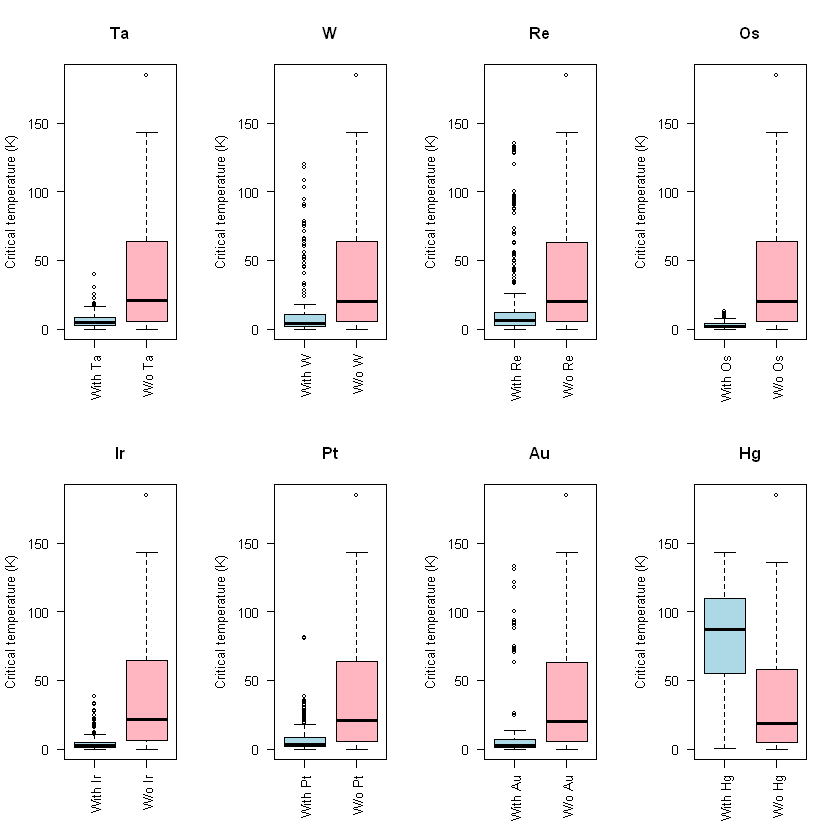

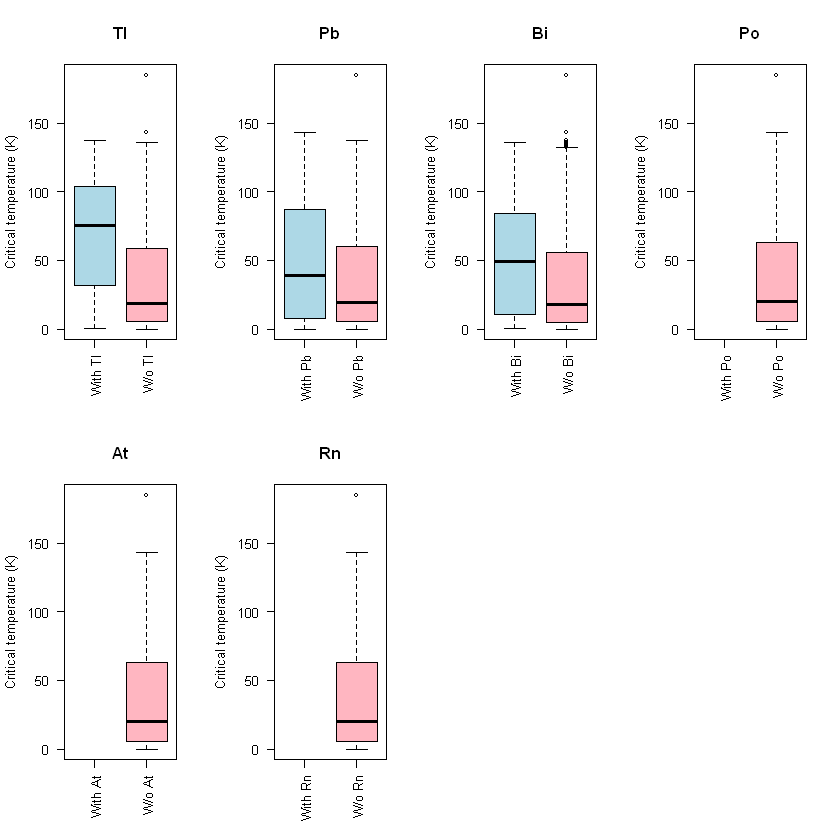

In [16]:
# layout
par(mfrow=c(2,4))

# loop to create boxplots showing the differences in Tc distribution between superconductors having and not having a certain element
for (i in 1:(ncol(unique)-2)) {
    # name of element
    name <- colnames(unique)[i]
    # extract the column of that element in dataframe
    column <- unique[i]
    # superconductors with a certain element (first group)
    with_el <- unique %>% filter(column!=0)
    # superconductors without a certain element (second group)
    without_el <- unique %>% filter(column==0)
    # Tc distribution of first group
    with_ct <- with_el$critical_temp
    w_name <- paste("With", name, sep=" ")
    # Tc distribution of second group
    without_ct <- without_el$critical_temp
    wo_name <- paste("W/o", name, sep=" ")

# create boxplot for each element
    boxplot(with_ct, without_ct, main=name, col=c("lightblue","lightpink"), names=c(w_name,wo_name), las=2, ylab="Critical temperature (K)")
}

- The above plot shows the differences in Tc distribution between superconductors having and not having a certain element
- Considering the three most popular elements 'O', 'Ba' and 'Cu', we can see quite similar Tc distribution pattern among them. In particular, the Tc of superconductors having one of these three elements are substantially high compared to superconductors not having them as an element
- Different conclusions can also be drawn by looking at other elements

## 3. Features Selection<a class="anchor" id="sec_3"></a>

### Feature normalisation
- The train dataset contains features highly varying in magnitudes, units and range
- For example, as mentioned above, Density has the highest range of upto 20,000 whereas Number of Element and Valence have small ranges of upto 10
- Rescaling the features in multiple linear regression is not required. Because the pre and post-rescaling models would yeild identical regression results. 
- However, for better intepretibility of the model, we are going to apply rescaling method for all features
- Because all features are possitive in nature, we are going to use min-max normalisation technique
- For better interpretability, we wouln't scale target variable 

In [17]:
# input a vector and output the normalized vector
normalize <- function(x) {
return ((x - min(x)) / (max(x) - min(x)))
}

In [18]:
# function to concat two dataframe with different number of rows
cbind.fill <- function(...){
    nm <- list(...) 
    nm <- lapply(nm, as.matrix)
    n <- max(sapply(nm, nrow)) 
    do.call(cbind, lapply(nm, function (x) 
        rbind(x, matrix(, n-nrow(x), ncol(x))))) 
}

In [19]:
# now, let's normalize our train dataset
# create an empty dataframe
nor_train <- data.frame()
# loop to go through and normalize all the column in original dataset
for (i in 1:(ncol(train)-1)) {
    # original column
    column <- train[i]
    # normalized column
    nor_column <- normalize(column)
    # add to the df
    nor_train <- cbind.fill(nor_train, nor_column)
}

nor_train <- as.data.frame(nor_train)

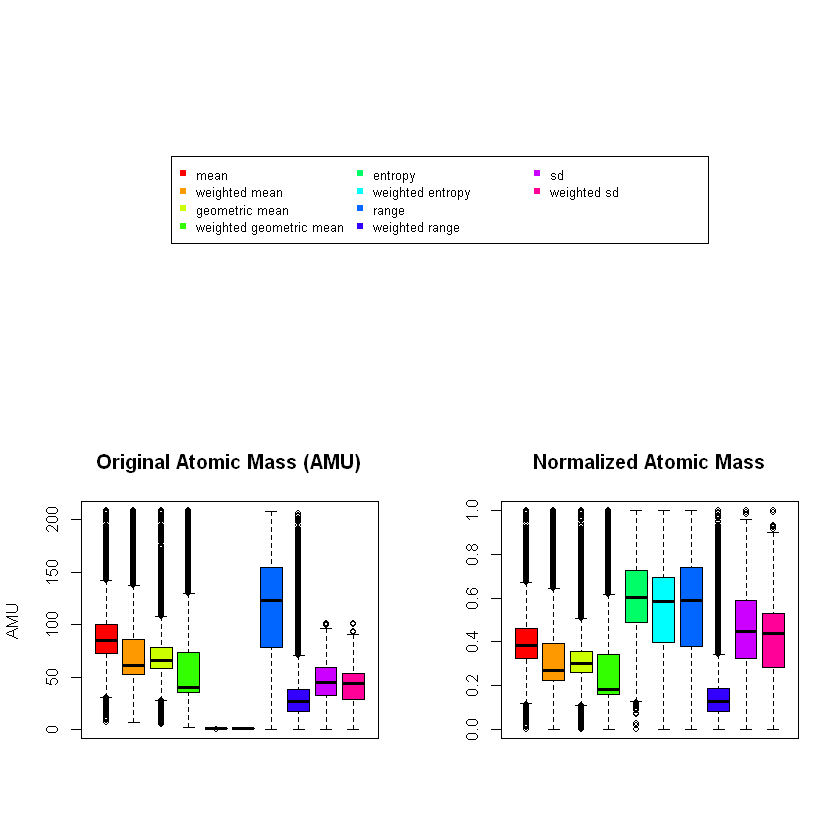

In [20]:
# take an example of atomic mass

# color theme
colors = rainbow(10)
# layout
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

# legend plot
plot(NULL ,xaxt='n',yaxt='n',bty='n',ylab='',xlab='', xlim=0:1, ylim=0:1)
legend("center", legend = features, col=colors, pch=15, cex=0.8, ncol=3)

# original data
amu=train[,2:11] 
boxplot(amu, ces.axis=1, main="Original Atomic Mass (AMU)", xaxt="n", ylab="AMU", col=colors,
            font.main=2, font.lab=2, font.sub=2)

# after normalization
nor_amu = nor_train[, 2:11] 
boxplot(nor_amu, ces.axis=1, main="Normalized Atomic Mass", xaxt="n", col=colors,
            font.main=2, font.lab=2, font.sub=2)


### Innitial linear model
- Here we are going to build a multiple linear model with full set of features

In [21]:
df <- cbind(nor_train,train["critical_temp"])
fit1 = lm(critical_temp~., data=df)
summary(fit1)


Call:
lm(formula = critical_temp ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.987  -9.370   0.595  10.976 171.246 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -12.368      3.067  -4.032 5.54e-05 ***
number_of_elements               -27.972      5.984  -4.674 2.97e-06 ***
mean_atomic_mass                 171.338     16.717  10.249  < 2e-16 ***
wtd_mean_atomic_mass            -183.126     20.874  -8.773  < 2e-16 ***
gmean_atomic_mass               -103.907     16.688  -6.226 4.86e-10 ***
wtd_gmean_atomic_mass            133.902     20.213   6.625 3.57e-11 ***
entropy_atomic_mass              -71.339      9.124  -7.819 5.58e-15 ***
wtd_entropy_atomic_mass            8.919      7.124   1.252 0.210617    
range_atomic_mass                 44.544      3.438  12.957  < 2e-16 ***
wtd_range_atomic_mass              5.342      4.539   1.177 0.239203    
std_atomic_mass                  -56.6

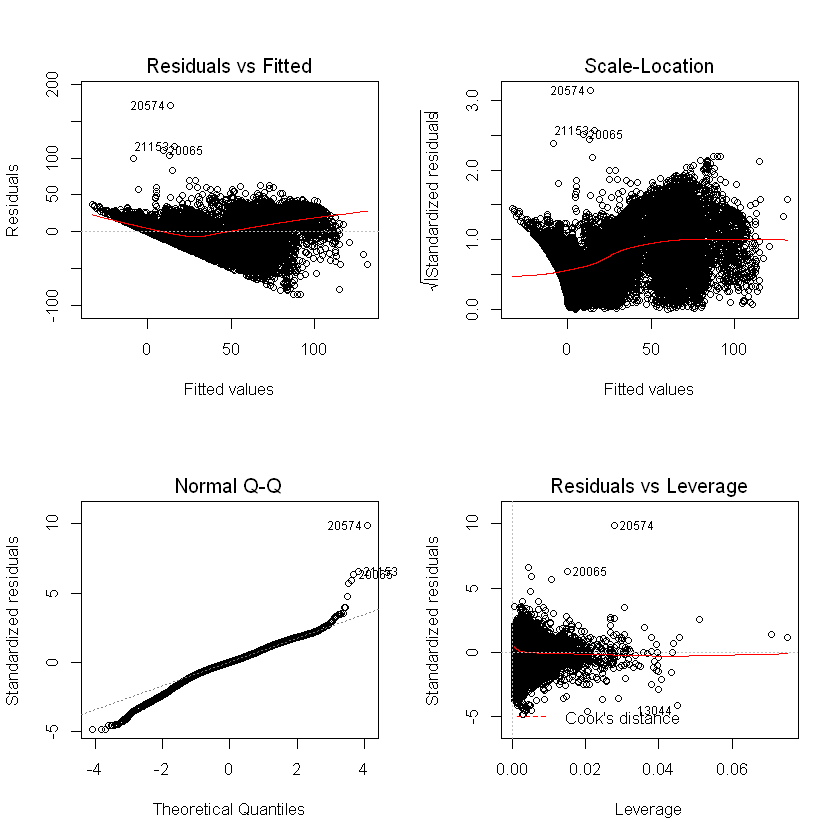

In [22]:
par(mfcol=c(2,2))
plot(fit1)

##### Statistics
- The F-statistic: 733.8 with  p-value: < 2.2e-16, suggesting that the model has predictive power
- There are some features with high p-values (> 0.01) which should be excluded from the set of features
- The adjusted R-squared ($R^2$) value indicates this model explains 73.73% of the variation in critical temperature.

##### Plots
- Looking at the first two plots "Residual vs. Fitted" and "Scale-location vs. Fitted", this model violates the assumption of homoscedasticity - the error terms change along the regression line. It might suggest the relationship between target variables and predictors is non-linear (?)
- "Normal Q-Q" illustrates that residuals are not normally distributed
- There are some outliers in the sample

#### Removal of non-significant features

In [23]:
# extract the features names
summary <- as.data.frame(summary(fit1)$coefficients[,4])
setDT(summary, keep.rownames = TRUE)
names(summary) <- c("Feature","P_value")
summary <- summary[-1]

# remove features with p-value greater than 0.01
temp <- summary %>% filter(P_value < 0.01)
ft <- c(temp$Feature)

# run the lm again
df <- cbind(nor_train[,ft],train["critical_temp"])
fit1_1 <- lm(critical_temp~., data=df)

In [24]:
# extract the new set of features 
summary <- as.data.frame(summary(fit1_1)$coefficients[,4])
setDT(summary, keep.rownames = TRUE)
names(summary) <- c("Feature","P_value")
summary <- summary[-1]

# new set of features
ft <- c(summary$Feature)

# new dataframe to work on
df <- cbind(nor_train[,ft],train["critical_temp"])

### Subset selection

In this section, we are going to select a set of features as input of our models in latter part
- As we have removed some of insignificant features earlier, now we proceed towards stepwise selection. In this part, forward, backward and hybrid stepwise are operated and compared
- Next, highly correlated features are detected and resolved
- Then, we examine the Multicollinearity and removed those with extreme VIF values
- Lasso regulization also used to deal with Multicollinearity
- Finally, interaction between features are added and evaluated by anova

#### Forward stepwise 

In [25]:
regfit.fwd <- regsubsets(critical_temp~., df,nvmax=NULL, method="forward")
reg.summary.fwd <- summary(regfit.fwd)
reg.summary.fwd

Subset selection object
Call: regsubsets.formula(critical_temp ~ ., df, nvmax = NULL, method = "forward")
63 Variables  (and intercept)
                              Forced in Forced out
number_of_elements                FALSE      FALSE
mean_atomic_mass                  FALSE      FALSE
wtd_mean_atomic_mass              FALSE      FALSE
gmean_atomic_mass                 FALSE      FALSE
wtd_gmean_atomic_mass             FALSE      FALSE
entropy_atomic_mass               FALSE      FALSE
range_atomic_mass                 FALSE      FALSE
std_atomic_mass                   FALSE      FALSE
wtd_gmean_fie                     FALSE      FALSE
entropy_fie                       FALSE      FALSE
wtd_entropy_fie                   FALSE      FALSE
range_fie                         FALSE      FALSE
wtd_range_fie                     FALSE      FALSE
std_fie                           FALSE      FALSE
mean_atomic_radius                FALSE      FALSE
wtd_mean_atomic_radius            FALSE      FAL

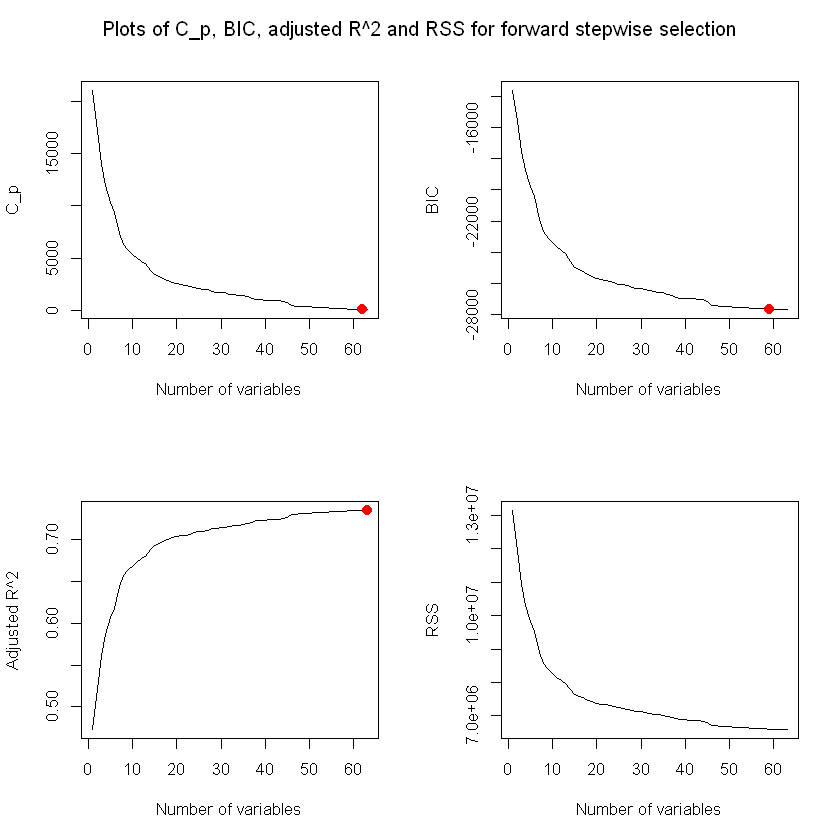

In [26]:
# forward stepwise selection plots
par(mfrow = c(2, 2))

# C/p
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)

# BIC
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)

# Adjusted R2
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)

# RSS
plot(reg.summary.fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

#### Backward stepwise

In [27]:
regfit.bwd <- regsubsets(critical_temp~.,df,nvmax=80, method="backward")
reg.summary.bwd <- summary(regfit.bwd)
reg.summary.bwd

Subset selection object
Call: regsubsets.formula(critical_temp ~ ., df, nvmax = 80, method = "backward")
63 Variables  (and intercept)
                              Forced in Forced out
number_of_elements                FALSE      FALSE
mean_atomic_mass                  FALSE      FALSE
wtd_mean_atomic_mass              FALSE      FALSE
gmean_atomic_mass                 FALSE      FALSE
wtd_gmean_atomic_mass             FALSE      FALSE
entropy_atomic_mass               FALSE      FALSE
range_atomic_mass                 FALSE      FALSE
std_atomic_mass                   FALSE      FALSE
wtd_gmean_fie                     FALSE      FALSE
entropy_fie                       FALSE      FALSE
wtd_entropy_fie                   FALSE      FALSE
range_fie                         FALSE      FALSE
wtd_range_fie                     FALSE      FALSE
std_fie                           FALSE      FALSE
mean_atomic_radius                FALSE      FALSE
wtd_mean_atomic_radius            FALSE      FALS

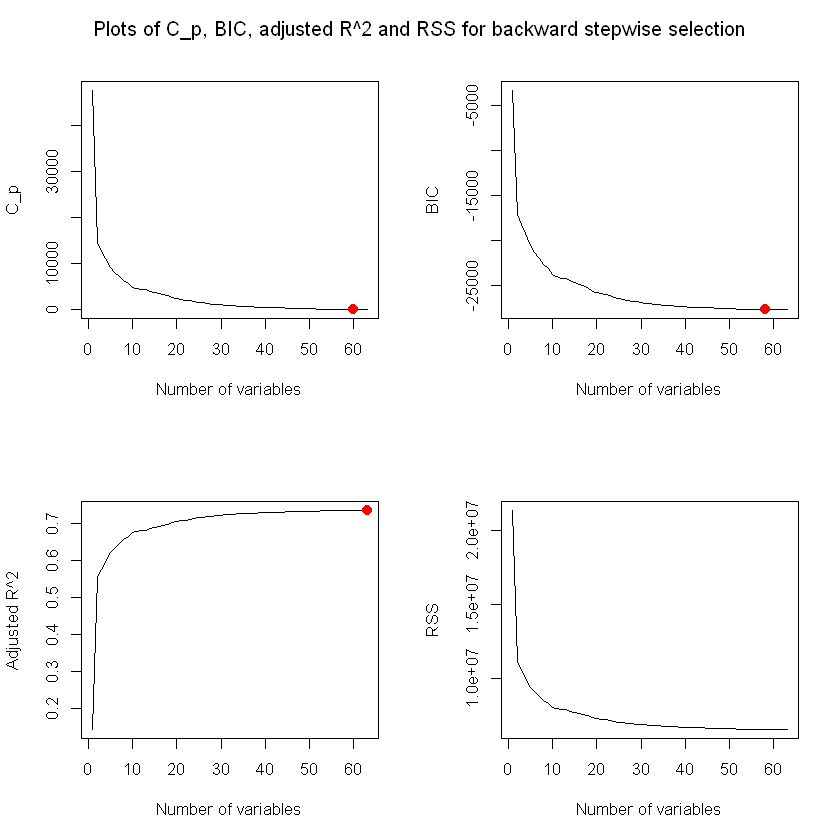

In [28]:
# the backward stepwise selection plots

par(mfrow = c(2, 2))

# C/p
plot(reg.summary.bwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.bwd$cp), reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)], 
       col = "red", cex = 2, pch = 20)

# BIC
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.bwd$bic), reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)], 
       col = "red", cex = 2, pch = 20)

# Adjusted R-square
plot(reg.summary.bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.bwd$adjr2), reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)], 
       col = "red", cex = 2, pch = 20)

# RSS
plot(reg.summary.bwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

- Backward and forward plots show that the best overall model has around 60 features, meaning almost all features are important

#### Hybrid stepwise

In [29]:
regfit.hybrid <- stepAIC(fit1_1, direction="both", trace=FALSE)
regfit.hybrid


Call:
lm(formula = critical_temp ~ number_of_elements + mean_atomic_mass + 
    wtd_mean_atomic_mass + gmean_atomic_mass + wtd_gmean_atomic_mass + 
    entropy_atomic_mass + range_atomic_mass + std_atomic_mass + 
    wtd_gmean_fie + entropy_fie + wtd_entropy_fie + range_fie + 
    wtd_range_fie + std_fie + mean_atomic_radius + wtd_mean_atomic_radius + 
    wtd_gmean_atomic_radius + entropy_atomic_radius + wtd_entropy_atomic_radius + 
    range_atomic_radius + wtd_range_atomic_radius + std_atomic_radius + 
    wtd_std_atomic_radius + mean_Density + wtd_gmean_Density + 
    entropy_Density + wtd_entropy_Density + range_Density + std_Density + 
    wtd_std_Density + wtd_mean_ElectronAffinity + gmean_ElectronAffinity + 
    wtd_gmean_ElectronAffinity + wtd_entropy_ElectronAffinity + 
    range_ElectronAffinity + wtd_range_ElectronAffinity + std_ElectronAffinity + 
    wtd_std_ElectronAffinity + mean_FusionHeat + wtd_mean_FusionHeat + 
    gmean_FusionHeat + wtd_gmean_FusionHeat + entropy_

In [30]:
fit1_2 <- lm(regfit.hybrid)
summary(fit1_2)


Call:
lm(formula = regfit.hybrid)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.926  -9.463   0.647  10.915 172.083 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -12.064      2.827  -4.268 1.98e-05 ***
number_of_elements             -25.947      5.698  -4.554 5.29e-06 ***
mean_atomic_mass               156.197     11.513  13.567  < 2e-16 ***
wtd_mean_atomic_mass          -169.335     10.249 -16.522  < 2e-16 ***
gmean_atomic_mass              -87.059     12.075  -7.210 5.79e-13 ***
wtd_gmean_atomic_mass          119.329     11.260  10.597  < 2e-16 ***
entropy_atomic_mass            -64.396      7.775  -8.283  < 2e-16 ***
range_atomic_mass               43.833      3.326  13.179  < 2e-16 ***
std_atomic_mass                -47.163      4.354 -10.832  < 2e-16 ***
wtd_gmean_fie                   20.932      3.704   5.651 1.62e-08 ***
entropy_fie                   -163.655     34.797  -4.703 2.58e-06 ***
wtd_

In [31]:
anova(fit1_1, fit1_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
21199,6586653,NA,NA,NA,NA
21202,6587906,-3,-1253.049,1.344304,0.2579628


- As the above anova table, p-value of 0.258 is larger than significant level of 0.01, suggesting that the two models are not significantly different. 
- Thus, for better intepretability, the smaller model fit1_1 with 60 features is preferred

In [32]:
# extract the new set of features 
summary <- as.data.frame(summary(fit1_2)$coefficients[,4])
setDT(summary, keep.rownames = TRUE)
names(summary) <- c("Feature","P_value")
summary <- summary[-1]

# new set of features
ft <- c(summary$Feature)

# new dataframe to work on
df <- cbind(nor_train[,ft],train["critical_temp"])

#### High correlation filter

- Features that have high correlation would follow similar trends and carry similar information
- Within a model, the presence of highly correlated features would negatively impact on the model performance
- As explored earlier, there are several features that are highly correlated with each others
- We would wish to remove those highly correlated features for a better model

In [33]:
# function to remove highly correlated features

HighlyCorrelated <- function(df) {
    cor_df <- cor(df)
    hc <- findCorrelation(cor_df, cutoff = 0.90) # cut-off threshold is set to be 0.95
    hc <- sort(hc) # list of highly correlated features
    after_df <- df[,-hc]
    removed <- c(colnames(df[,hc])) 
    
    # print out what have been removed from the model
    print(paste("Due to redundency in terms of high correlation,",length(removed),"features have been removed:"))
    for (i in 1:length(removed)){
        print(removed[i])
    }
    
    return (after_df)
}

In [34]:
# remove high correlation from df
hc_df <- HighlyCorrelated(df)

# update the list of features
hc_ft <- colnames(hc_df)

[1] "Due to redundency in terms of high correlation, 24 features have been removed:"
[1] "number_of_elements"
[1] "gmean_atomic_mass"
[1] "wtd_gmean_atomic_mass"
[1] "entropy_atomic_mass"
[1] "range_atomic_mass"
[1] "entropy_fie"
[1] "range_fie"
[1] "wtd_gmean_atomic_radius"
[1] "entropy_atomic_radius"
[1] "wtd_entropy_atomic_radius"
[1] "range_atomic_radius"
[1] "wtd_std_atomic_radius"
[1] "std_Density"
[1] "wtd_std_Density"
[1] "range_ElectronAffinity"
[1] "wtd_mean_FusionHeat"
[1] "gmean_FusionHeat"
[1] "wtd_gmean_FusionHeat"
[1] "entropy_FusionHeat"
[1] "range_FusionHeat"
[1] "range_ThermalConductivity"
[1] "wtd_gmean_Valence"
[1] "entropy_Valence"
[1] "wtd_entropy_Valence"


- 24 features got removed
- We now have around 30 features left

In [35]:
fit1_3 <- lm(critical_temp~.,data=hc_df)

#### Multicollinearity filter
- "Multicollinearity is a state of very high intercorrelations or inter-associations among the independent variables." (https://www.statisticssolutions.com/multicollinearity/). Multicollinearity is a problem because it undermines the statistical significance of an independent variable.
- In our dataset, 10 features extracted from each of the eight property can be highly correlated in a multiple linear relationship (For example, mean and weighted mean). Thus, we shall wish to examine the multicollinearity amongst the features.
- VIF (Variance Inflation Factor) is the score computed to show the multicollinearity of a pridictor to the rest of the model features. Usually, the rule of thumb is that VIF of more than 10 would discount the model performance.

In [36]:
# use vif score from capret library
# create a df of vif 
vif <- as.data.frame(car::vif(fit1_3))
setDT(vif, keep.rownames=TRUE) # keep name
names(vif) <- c("Feature","VIF") # rename
vif <- vif[order(-vif$VIF)] # sort by VIF
vif

Feature,VIF
wtd_mean_ElectronAffinity,64.013282
wtd_gmean_ElectronAffinity,56.017969
wtd_entropy_fie,36.667302
wtd_mean_ThermalConductivity,36.655051
std_ThermalConductivity,34.869995
wtd_mean_atomic_radius,25.933451
wtd_gmean_Density,24.438221
wtd_range_fie,22.782406
wtd_mean_atomic_mass,19.941326
mean_atomic_mass,19.731882


- In overall, VIFs are very high for our set of features, suggesting there is severe multicollinearity amongst the features
- We are going to remove those features with very high VIF

In [37]:
# remove those features with extremely high VIF of above 25
reduce <- vif %>% filter(VIF<25)

# get the list of feature
multi_ft <- reduce$Feature

# run linear model again on the set of features
multi_df <- cbind(nor_train[,multi_ft],train["critical_temp"])
fit1_4 <- lm(critical_temp~.,data=multi_df)

# display the VIF of the new model
vif2 <- as.data.frame(car::vif(fit1_4))
setDT(vif2, keep.rownames=TRUE) # keep name
names(vif2) <- c("Feature","VIF") # rename
vif2 <- vif2[order(-vif2$VIF)] # sort by VIF
vif2

Feature,VIF
wtd_gmean_Density,23.631699
mean_Density,17.744610
wtd_mean_atomic_mass,16.808521
mean_atomic_mass,15.836187
wtd_entropy_FusionHeat,13.919873
wtd_range_fie,11.536706
std_fie,11.298279
entropy_Density,10.997139
wtd_std_ElectronAffinity,10.961403
wtd_entropy_Density,10.776023


- After removing very high VIF, we still have those features that have VIF above 10

#### Shrinkage method - The Lasso
- One side effect of multicollinearity is overfitting
- Given that regularization techniques add a penalty to model parameters, the model generalizes the data instead of overfitting (https://www.lexjansen.com/wuss/2018/131_Final_Paper_PDF.pdf)
- Next, we will use Lasso (a Regulization technique) to deal with the problem

In [38]:
# keep the same values
set.seed(1)

# matrix to store predictors
xmat <- model.matrix(critical_temp~., data = multi_df)
# drop the first column of intercept
xmat <- xmat[,-1]

# our target variable
y = multi_df$critical_temp

# setting alpha=1, implementing lasso regression
cv.lasso <- cv.glmnet(xmat, y, alpha = 1)

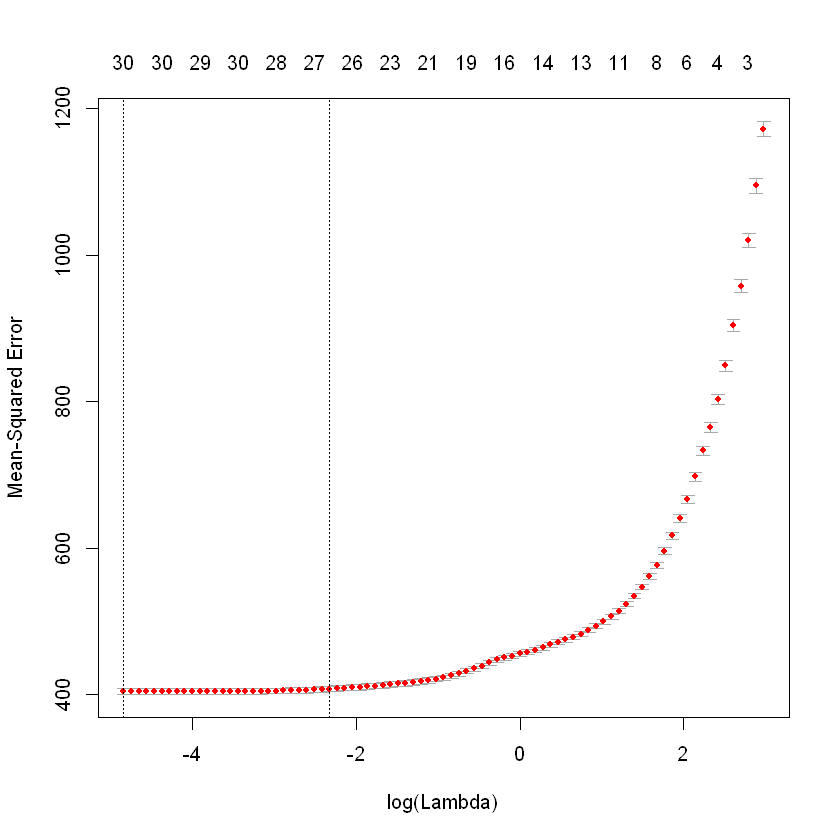

In [39]:
plot(cv.lasso)

In [40]:
# the best lambda value
bestlam <- cv.lasso$lambda.min
bestlam

[1] 0.007924511

In [41]:
# fit lasso regression
fit.lasso <- glmnet(xmat, y, alpha = 1)
lasso <- predict(fit.lasso, s = bestlam, type = "coefficients")[1:28,]

In [42]:
# the coefficients
lasso

(Intercept)             wtd_gmean_Density 
                    16.794636                     53.398571 
                wtd_range_fie          wtd_mean_atomic_mass 
                   -39.698848                    -33.909518 
             mean_atomic_mass      wtd_std_ElectronAffinity 
                    40.988292                     -6.688222 
wtd_range_ThermalConductivity                  mean_Density 
                    91.553659                    -72.124985 
     mean_ThermalConductivity        wtd_entropy_FusionHeat 
                    62.990716                     50.839264 
 wtd_entropy_ElectronAffinity               entropy_Density 
                   -61.175136                     -9.724670 
   wtd_range_ElectronAffinity           wtd_entropy_Density 
                   -55.688696                      4.283378 
                      std_fie                 wtd_gmean_fie 
                     7.682869                     18.116743 
wtd_gmean_ThermalConductivity             std_atomic_radius 
                  -113.113446                     39.877691 
         std_ElectronAffinity   entropy_ThermalConductivity 
                    26.461814                     23.383690 
       gmean_ElectronAffinity            mean_atomic_radius 
                   -14.933898                    -16.504200 
      wtd_range_atomic_radius                 gmean_Valence 
                     1.586744                      2.761816 
              mean_FusionHeat               wtd_std_Valence 
                   -12.584156                    -66.258614 
                range_Valence                 range_Density 
                    20.837326                      3.627799

- Although Lasso has shrunk the predictor coefficients, none of them become zero.
- Thus, after this step, we still keep the same set of features

#### Removal of insignificant features

In [43]:
# below is the linear regression of current set of features
summary(fit1_4)


Call:
lm(formula = critical_temp ~ ., data = multi_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.706  -12.429   -0.487   13.156  193.128 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     16.572      2.286   7.251 4.29e-13 ***
wtd_gmean_Density               58.600      3.805  15.400  < 2e-16 ***
wtd_range_fie                  -42.173      2.614 -16.132  < 2e-16 ***
wtd_mean_atomic_mass           -38.378      3.416 -11.236  < 2e-16 ***
mean_atomic_mass                45.753      3.732  12.260  < 2e-16 ***
wtd_std_ElectronAffinity        -9.921      3.774  -2.629  0.00858 ** 
wtd_range_ThermalConductivity   91.714      2.363  38.807  < 2e-16 ***
mean_Density                   -77.692      4.604 -16.875  < 2e-16 ***
mean_ThermalConductivity        64.416      2.003  32.166  < 2e-16 ***
wtd_entropy_FusionHeat          52.076      2.426  21.467  < 2e-16 ***
wtd_entropy_ElectronAffinity   -62.214      

The four features below have quite high p-value, suggesting they are not significant to the model
- wtd_std_ElectronAffinity (**)
- wtd_entropy_Density (*)
- gmean_Valence ()
- wtd_range_atomic_radius ()

Let's try to remove them and use anova test to examine whether the reduced models are different from the full model

In [44]:
# remove the three features: wtd_entropy_Density; gmean_Valence and wtd_range_atomic_radius
fit1_5 <- lm(critical_temp~.
             -wtd_entropy_Density
             -gmean_Valence
             -wtd_range_atomic_radius,data=multi_df)

# here, we further remove wtd_std_ElectronAffinity
fit1_6 <- lm(critical_temp~.
             -wtd_std_ElectronAffinity
             -wtd_entropy_Density
             -gmean_Valence
             -wtd_range_atomic_radius,data=multi_df)

In [45]:
anova(fit1_4,fit1_5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
21232,8565095,NA,NA,NA,NA
21235,8568810,-3,-3715.517,3.07013,0.02664212


- The p-value of 0.03 is larger than the significant level of 0.01, thus we fail to reject the null hypothesis and the two pairs of models are not significant different. Hence, the smaller model is preferable compared to the full one
- After this step, we remove the four adforementioned features

#### Interations between subsetted features

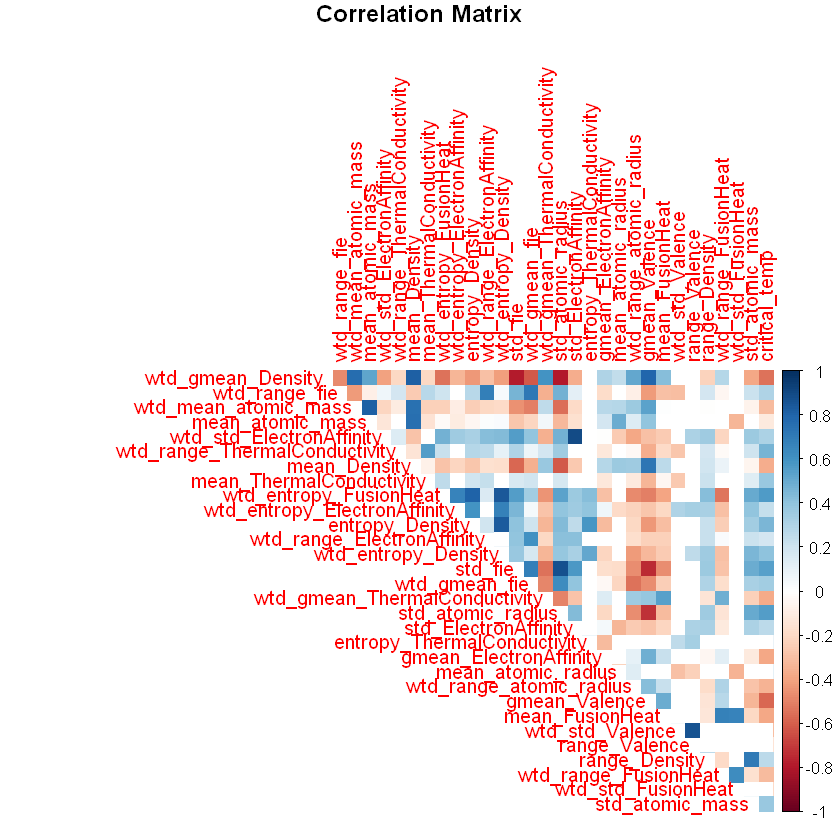

In [46]:
cor.matrix <- cor(multi_df)
p.mat <- cor.mtest(cor.matrix)

corrplot(cor.matrix, method="color",
        diag=FALSE, type="upper",
        title="Correlation Matrix",
#         addCoef.col="black",
#         tl.col="black",
        p.mat=p.mat, sig.level=0.05, insig="blank",
        mar=c(0,0,1,0))

According to the correlation matrix, we can see there are still some highly correlated features
- wtd_std_ElectronAffinity and std_ElectronAffinity
- wtd_std_Valence and range_Valence
- wtd_gmean_Density and mean_Density

Let's add these interactions to the model and use anova test to examine the significance of adding new features

In [47]:
# add interactions
fit1_7 <- lm(critical_temp~.
             -wtd_std_ElectronAffinity
             -wtd_entropy_Density
             -gmean_Valence
             -wtd_range_atomic_radius
             +wtd_std_ElectronAffinity:std_ElectronAffinity
             +wtd_std_Valence:range_Valence
             +wtd_gmean_Density:mean_Density
             +std_fie:std_atomic_radius, data=multi_df)

In [48]:
# anova check
anova(fit1_6,fit1_7)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
21236,8570718,NA,NA,NA,NA
21232,8331747,4,238971,152.244,1.248058e-128


- The p-value is almost zero, suggesting the bigger model is better
- To avoid redundency, let's try to remove some features from the interaction relationship

In [49]:
# remove std_atomic_radius
fit1_8 <- lm(critical_temp~.
             -wtd_std_ElectronAffinity
             -wtd_entropy_Density
             -gmean_Valence
             -wtd_range_atomic_radius
             +wtd_std_ElectronAffinity:std_ElectronAffinity
             +wtd_std_Valence:range_Valence
             +wtd_gmean_Density:mean_Density
             +std_fie:std_atomic_radius
             -std_atomic_radius, data=multi_df)

# remove further entropy_Density
fit1_9 <- lm(critical_temp~.
             -wtd_std_ElectronAffinity
             -wtd_entropy_Density
             -gmean_Valence
             -wtd_range_atomic_radius
             +wtd_std_ElectronAffinity:std_ElectronAffinity
             +wtd_std_Valence:range_Valence
             +wtd_gmean_Density:mean_Density
             +std_fie:std_atomic_radius
             -std_atomic_radius-entropy_Density, data=multi_df)

# remove further wtd_gmean_fie
fit1_10 <- lm(critical_temp~.
              -wtd_std_ElectronAffinity
              -wtd_entropy_Density
              -gmean_Valence
              -wtd_range_atomic_radius
              +wtd_std_ElectronAffinity:std_ElectronAffinity
              +wtd_std_Valence:range_Valence
              +wtd_gmean_Density:mean_Density
              +std_fie:std_atomic_radius
              -std_atomic_radius-entropy_Density-wtd_gmean_fie, data=multi_df)

In [50]:
# run anova to examine the difference
anova(fit1_7,fit1_8, fit1_9, fit1_10)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
21232,8331747,NA,NA,NA,NA
21233,8333647,-1,-1899.584,4.840757,0.02780542
21234,8335354,-1,-1707.102,4.350250,0.03701541
21235,8336473,-1,-1119.412,2.852625,0.09123955


All the p-values are greater than the significant level of 0.01. We fail to reject the null hypothesis at 0.01.
Hence, the smaller model is selected for better intepretability of the model

## 4. Model Development<a class="anchor" id="sec_4"></a>

#### Function to Calculate Model Accuracy Statistics
(Source: FIT5149 Tutorial material Week 6)

Name: Model.Accuracy

Input parameters:
- predicted - a vector of predictions
- target - a vector containing the target values for the predictions 
- df - the degrees of freedom
- p - the number of parameters excluding the coefficient

Return Value:

A list containing:
- rsquared - the R-Squared value calculated from the predicted and target values
- rse - the residual standard error
- f.stat - the F-statistic

Description:

Calculate the TSS and RSS as:
- TSS: $\sum_{i=1}^n (y_i - \bar y)^2$
- RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$

Calculate the statistics according to the following formulae:
- R-Squared value: $R^2 = 1 - \frac{RSS}{TSS}$
- Residual standard error - $\sqrt{\frac{1}{df}RSS}$
- F-statistics - $\frac{(TSS - RSS)/p}{RSS / df}$

In [51]:
Model.Accuracy <- function(predicted, target, df, p) {
    rss <- 0
    tss <- 0
    target.mean <- mean(target)
    for (i in 1:length(predicted)) {
        rss <- rss + (predicted[i]-target[i])^2
        tss <- tss + (target[i]-target.mean)^2
    }
    rsquared <- 1 - rss/tss
    rse <- sqrt(rss/df)
    f.stat <- ((tss-rss)/p) / (rss/df)
    return(list(rsquared=rsquared,rse=rse,f.stat=f.stat))
}

### Model 1: Least Square Model

This regression attempts to fit a line that minimizes the vertical distance from the data points to the regression line.
The "least squares" line is also the one minimizes the variance.

In this section, we are going to build a model taking around 30 features of superconductor and predicting a correspondent critical temperature

The set of features are selected from the above section

#### Split between train and test data

In [52]:
set.seed(7)

# train data
train = sample(1:dim(multi_df)[1], dim(multi_df)[1] * 0.7)
# test data
test <- -train
# train df
DF.train <- multi_df[train, ]
# test df
DF.test <- multi_df[test, ]

#### Build model

As described above, the model can be built by

In [53]:
fit.One <- lm(critical_temp~.
              -wtd_std_ElectronAffinity
              -wtd_entropy_Density
              -gmean_Valence
              -wtd_range_atomic_radius
              +wtd_std_ElectronAffinity:std_ElectronAffinity
              +wtd_std_Valence:range_Valence
              +wtd_gmean_Density:mean_Density
              +std_fie:std_atomic_radius
              -std_atomic_radius-entropy_Density-wtd_gmean_fie, data=DF.train)

#### Model accuracy

In [54]:
summary(fit.One)


Call:
lm(formula = critical_temp ~ . - wtd_std_ElectronAffinity - wtd_entropy_Density - 
    gmean_Valence - wtd_range_atomic_radius + wtd_std_ElectronAffinity:std_ElectronAffinity + 
    wtd_std_Valence:range_Valence + wtd_gmean_Density:mean_Density + 
    std_fie:std_atomic_radius - std_atomic_radius - entropy_Density - 
    wtd_gmean_fie, data = DF.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.568  -12.120   -0.552   12.965  188.819 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                     47.480      2.086  22.764
wtd_gmean_Density                               40.822      5.549   7.357
wtd_range_fie                                  -41.569      2.073 -20.052
wtd_mean_atomic_mass                           -41.769      3.504 -11.919
mean_atomic_mass                                47.881      4.021  11.907
wtd_range_ThermalConductivity                   85.532      2.490  34.354
m

In [55]:
par(mfcol=c(2,2))
plot(modelOne)

ERROR: Error in plot(modelOne): object 'modelOne' not found


##### Statistics
- The F-statistic: 1088 with  p-value: < 2.2e-16, suggesting that the model has predictive power
- All the features with very low p-values (< 0.01), indicating their significance to the model
- The adjusted R-squared ($R^2$) value indicates this model explains 66.66% of the variation in critical temperature.

##### Plots
- Looking at the first two plots "Residual vs. Fitted" and "Scale-location vs. Fitted", this model violates the assumption of homoscedasticity - the error terms change along the regression line. It might suggest the relationship between target variables and predictors cannot be fully explained by linear relationship
- "Normal Q-Q" illustrates that residuals are not normally distributed
- There are some outliers in the sample

#### Feature importance

In [140]:
# evaluate the importance of features
set.seed(7)

importance <- as.data.frame(varImp(fit.One, scale=FALSE))
setDT(importance, keep.rownames = TRUE)
# summarize importance
print(importance[order(-importance[,2]),])

                                               rn   Overall
 1:                 wtd_gmean_ThermalConductivity 36.703961
 2:                 wtd_range_ThermalConductivity 34.354286
 3:                        wtd_entropy_FusionHeat 27.821822
 4:                      mean_ThermalConductivity 26.764792
 5:                  wtd_entropy_ElectronAffinity 24.178335
 6:                     std_fie:std_atomic_radius 22.452501
 7:                               wtd_std_Valence 20.860342
 8:                                 wtd_range_fie 20.052018
 9:                                  mean_Density 15.626907
10:                    wtd_range_ElectronAffinity 15.534973
11:                   entropy_ThermalConductivity 14.651591
12:                                       std_fie 13.121878
13:                          wtd_range_FusionHeat 12.956837
14:                               std_atomic_mass 12.600298
15:                          wtd_mean_atomic_mass 11.918723
16:                              mean_at

- ThermalConductivity properties such as wtd_range_ThermalConductivity, wtd_gman_ThermalConductivity and mean_ThermalConductivity are highly important to the model
- Some other important predictors are wtd_entropy_FusionHeat, wtd_entropy_ElectronAffinity
- The interaction features are not very important

#### Model evaluation

In [58]:
pre.One <- predict(fit.One, DF.test)

In [141]:
# Transform the predicted values to house prices
ct.predict <- fit.One$fitted.values

# Calculate the accuracy statistics
ct.accuracy <- Model.Accuracy(ct.predict,DF.train$critical_temp,14856,27)

# Print the accuracy statistics
cat("\nModel accuracy of the first model: Least Squared Model\n")
cat("\nDegrees of freedom: 9784\nModel parameters: 27 plus intercept")
cat("\nMean Square Error:",mean((pre.One - DF.test$critical_temp)^2))
cat("\nRMSE:",sqrt(mean((pre.One - DF.test$critical_temp)^2)))
cat("\nResidual standard error:",ct.accuracy$rse)
cat("\nR-Squared:",ct.accuracy$rsquared)



Model accuracy of the first model: Least Squared Model

Degrees of freedom: 9784
Model parameters: 27 plus intercept
Mean Square Error: 388.9274
RMSE: 19.72124
Residual standard error: 19.85839
R-Squared: 0.6630174

### Model 2: Lasso Regression (10-fold cross-validation)

Lasso regression is another type of linear regression using coefficient shrinkage tachnique. This particular regression is most suiatble for sample that has problem with multicollinearity. Furthermore, feature selection can be done automatically.

"Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models." (source: https://www.statisticshowto.datasciencecentral.com/lasso-regression/)

As explored earlier, multicollinearity is quite severe in our dataset. Thus, using Lasso Regression is promised to outperform the Least Square method

#### Prepare train and validate dataset

In [90]:
# remove some features as described above
removed <- c("wtd_std_ElectronAffinity","wtd_entropy_Density","gmean_Valence","wtd_range_atomic_radius")

# add interactions between pairs of features

# first interaction
int1 <- multi_df["wtd_std_ElectronAffinity"]*multi_df["std_ElectronAffinity"]
names(int1) <- "wtd_std_ElectronAffinity:std_ElectronAffinity"
# second interaction
int2 <- multi_df["wtd_std_Valence"]*multi_df["range_Valence"]
names(int2) <- "wtd_std_Valence:range_Valence"
# third interaction
int3 <- multi_df["wtd_gmean_Density"]*multi_df["mean_Density"]
names(int3) <- "wtd_gmean_Density:mean_Density"
# forth interaction
int4 <- multi_df["std_fie"]*multi_df["std_atomic_radius"]
names(int4) <- "std_fie:std_atomic_radius"

# combine as df
lasso_df <- cbind(multi_df[,!(names(multi_df) %in% removed)],int1,int2,int3,int4)

In [107]:
set.seed(8)

# train data
train.ls = sample(1:dim(lasso_df)[1], dim(lasso_df)[1] * 0.7)
# test data
test.ls <- -train.ls
# train df
Lasso.train <- lasso_df[train.ls, ]
# test df
Lasso.test <- lasso_df[test.ls, ]

In [108]:
train.mat <- model.matrix(critical_temp ~ ., data = Lasso.train)[,-1]
test.mat <- model.matrix(critical_temp ~ ., data = Lasso.test)[,-1]

#### Buid the model

In [109]:
# keep the same values
set.seed(1)

lambdas_to_test = 10^seq(-3,5,length.out=10)

# our target variable
y = Lasso.train$critical_temp

# setting alpha=1, implementing lasso regression
cv.lasso <- cv.glmnet(train.mat, y, alpha = 1, lambda=lambdas_to_test, standardize=TRUE, nfolds=10)

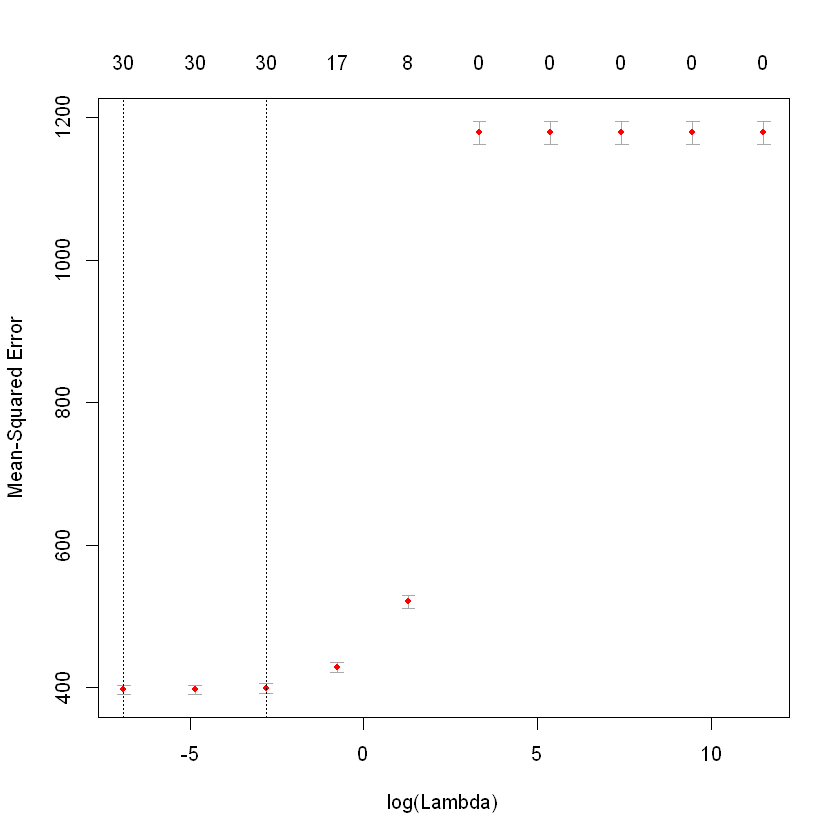

In [110]:
plot(cv.lasso)

In [111]:
# best cross-validation lambda
lambda.cv <- cv.lasso$lambda.min

In [112]:
# Fit final model, get its sum of squared residuals and multiple R-squared
fit.Two <- glmnet(train.mat, y, alpha = 1, lambda = lambda.cv, standardize = TRUE, thresh=1e-12)

#### Feature importance

In [139]:
# evaluate the importance of features
set.seed(7)

importance <- as.data.frame(varImp(fit.Two, lambda=lambda.cv, scale=FALSE))
setDT(importance, keep.rownames = TRUE)
# summarize importance
print(importance[order(-importance[,2]),])

                                                 rn    Overall
 1:                   wtd_gmean_ThermalConductivity 116.523704
 2:                     `std_fie:std_atomic_radius` 103.210048
 3:                                    mean_Density  93.406180
 4:                   wtd_range_ThermalConductivity  89.304247
 5:                                 wtd_std_Valence  78.520201
 6:                    wtd_entropy_ElectronAffinity  64.247452
 7:                        mean_ThermalConductivity  62.751799
 8:                          wtd_entropy_FusionHeat  53.871242
 9:                      wtd_range_ElectronAffinity  51.855482
10:                                mean_atomic_mass  50.819678
11:                               wtd_gmean_Density  50.196597
12:                 `wtd_std_Valence:range_Valence`  49.700952
13:                                         std_fie  46.435486
14:                            wtd_mean_atomic_mass  45.065363
15:                                   wtd_range_fie  41

- Similarly to the first model, ThermalConductivity properties are also important to Lasso Model
- Here the interaction features have more magnitude in terms of importance

#### Model evaluation

In [143]:
# predicted values
pred.lasso <- predict(fit.Two, s = lambda.cv, newx = test.mat)

# mean((pred.lasso - Lasso.test$critical_temp)^2)

In [144]:
rsq_lasso_cv <- cor(Lasso.test$critical_temp, pred.lasso)^2
# rsq_lasso_cv[1]

In [145]:
# Print the accuracy statistics
cat("\nModel accuracy of the second model: Lasso Regression\n")
cat("\nDegrees of freedom: 9784\nModel parameters: 27 plus intercept")
cat("\nMean Square Error:",mean((pred.lasso - Lasso.test$critical_temp)^2))
cat("\nRMSE:",sqrt(mean((pred.lasso - Lasso.test$critical_temp)^2)))
cat("\nR-Squared:",rsq_lasso_cv[1])


Model accuracy of the second model: Lasso Regression

Degrees of freedom: 9784
Model parameters: 27 plus intercept
Mean Square Error: 384.6291
RMSE: 19.61196
R-Squared: 0.6685031

### Model 3: Random Forest Regression

- The two above methods are linear regression
- Random Forest Regression, on the other hand, is an ensemble technique the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. "Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement." (source https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb)

In [70]:
fit.Three <- randomForest(critical_temp~., data=DF.train, importance=TRUE)

#### Model evaluation

In [71]:
print(fit.Three)


Call:
 randomForest(formula = critical_temp ~ ., data = DF.train, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 92.56406
                    % Var explained: 92.08


In [148]:
# predict in test dataframe
set.seed(1)
yhat <- predict(fit.Three, newdata = DF.test)

cat("\nMean Square Error:",mean((yhat - DF.test$critical_temp)^2))


Mean Square Error: 96.90651

In [137]:
# evaluate the importance of features
set.seed(7)

importance <- as.data.frame(varImp(fit.Three, scale=FALSE))
setDT(importance, keep.rownames = TRUE)
# summarize importance
print(importance[order(-importance[,2]),])

                               rn   Overall
 1:                       std_fie 321.28899
 2:        wtd_entropy_FusionHeat 293.33227
 3:                 gmean_Valence 279.78942
 4:               wtd_std_Valence 267.81074
 5:      wtd_std_ElectronAffinity 253.63377
 6: wtd_range_ThermalConductivity 251.03892
 7:             wtd_gmean_Density 220.22409
 8:               std_atomic_mass 155.70759
 9:             std_atomic_radius 138.75858
10:      mean_ThermalConductivity 120.63507
11: wtd_gmean_ThermalConductivity 109.67051
12:           wtd_entropy_Density 107.08750
13:                 range_Density 100.43512
14:               entropy_Density  97.89995
15:          std_ElectronAffinity  87.42968
16:          wtd_range_FusionHeat  80.68775
17:          wtd_mean_atomic_mass  78.33003
18:            wtd_std_FusionHeat  77.24485
19:        gmean_ElectronAffinity  73.58456
20:    wtd_range_ElectronAffinity  70.70760
21:                 wtd_range_fie  56.03723
22:  wtd_entropy_ElectronAffinit

## 5. Model Comparsion and conclusion<a class="anchor" id="sec_5"></a>

#### Least Squares vs. Lasso Regression (10-fold cross validation)
- It is worth to remind that the dataset has significant problem with multicollinearity. As mentioned earlier, some features are highly correlated with each other, such as mean and weighted mean values of a property. VIF computation also illustrates very high inter-related amongst features in terms of linear relationship
- In this situation, Lasso is believed to outperform Least Squares Regression. Lasso addresses multicollinearity using shrinkage technique so that one of the correlated predictors has a larger coefficient, while the rest are (nearly) zeroed.
- In our situation, Lasso regression has reduced mean sqare of error compared to Least Squares Model from 389 to 285. Adjusted R-squared value of Lasso regression is also slightly higher, 66.85% vs. 66.3%
- In terms of feature importance, both models recognize ThermalConductivity features as highly important

#### Drawbacks of Linear Regression
- With F-statistics of 1088 and p-value of nearly zero, Least Square suggests that the linear regression has predictive power
- However, by looking at the "Residual vs. Fitted" plot, we can see linear regression violates the assumption of homoscedasticity because the error terms change along the regression line. Furthermore, residuals are not normally distributed.
- From there, it implies that perhaps linear regression is not a perfect model for predicting critical temperature
- We might need a more flexible and complexe model to improve the predictivity power
- Adjusted R-squares are quite low for the two models, both are just below 70%

#### Random forest regression
- Random forest regression works extremely good in this situation as compared to the two linear regression models
- Mean square error is only 92 and 92% of variables are explained by the model
- Rendom forest regconizes feature importance differently compared to the two above methods, where the most important features are std_fie, wtd_entropy_FusionHeat and Valence properties


## 6. References <a class="anchor" id="sec_6"></a>

Visualize correlation matrix using correlogram http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram 

A data-driven statistical model for predicting the Critical Temperature of a Superconductor, Kam Hamidieh, 2018

Multicollinearity https://www.statisticssolutions.com/multicollinearity/

Regulation Techniques for Multicollinearity: Lasso, Ridge, and Elastic Nets (https://www.lexjansen.com/wuss/2018/131_Final_Paper_PDF.pdf)

Output as PDF http://compbio.ucsd.edu/outputting-beautiful-jupyter-notebooks-r-kernel-edition/#pdf-output-line-truncation

Lasso regression https://www.statisticshowto.datasciencecentral.com/lasso-regression/

Random Forest https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb
